In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Cell 2: Load All Datasets
# Update file paths if needed
data_path = "./"  # Change this if files are in a different directory

try:
    # Load all CSV files
    courses = pd.read_csv(f'{data_path}courses.csv')
    assessments = pd.read_csv(f'{data_path}assessments.csv')
    vle = pd.read_csv(f'{data_path}vle.csv')
    student_info = pd.read_csv(f'{data_path}studentInfo.csv')
    student_reg = pd.read_csv(f'{data_path}studentRegistration.csv')
    student_assessment = pd.read_csv(f'{data_path}studentAssessment.csv')
    student_vle = pd.read_csv(f'{data_path}studentVle.csv')
    
    print("✅ All files loaded successfully!")
    print("\n📊 Dataset Sizes:")
    print(f"   courses: {courses.shape}")
    print(f"   assessments: {assessments.shape}")
    print(f"   vle: {vle.shape}")
    print(f"   student_info: {student_info.shape}")
    print(f"   student_reg: {student_reg.shape}")
    print(f"   student_assessment: {student_assessment.shape}")
    print(f"   student_vle: {student_vle.shape}")
    
except FileNotFoundError as e:
    print(f"❌ Error loading files: {e}")
    print("Please check your file paths!")

✅ All files loaded successfully!

📊 Dataset Sizes:
   courses: (22, 3)
   assessments: (206, 6)
   vle: (6364, 6)
   student_info: (32593, 12)
   student_reg: (32593, 5)
   student_assessment: (173912, 5)
   student_vle: (10655280, 6)


In [3]:
# Cell 3: Display Sample Data
print("📋 Sample Data from Each Table:")
print("="*50)

# Create a function to display sample data nicely
def show_sample(df, name, n=3):
    display(Markdown(f"### {name} (First {n} rows)"))
    display(df.head(n))
    display(Markdown(f"**Columns:** {', '.join(df.columns.tolist())}"))
    print("\n" + "="*50 + "\n")

# Show samples
show_sample(courses, "Courses")
show_sample(assessments, "Assessments")
show_sample(vle, "VLE Materials")
show_sample(student_info, "Student Information")

📋 Sample Data from Each Table:


### Courses (First 3 rows)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268


**Columns:** code_module, code_presentation, module_presentation_length

### Assessments (First 3 rows)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0


**Columns:** code_module, code_presentation, id_assessment, assessment_type, date, weight

### VLE Materials (First 3 rows)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN


**Columns:** id_site, code_module, code_presentation, activity_type, week_from, week_to

### Student Information (First 3 rows)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn


**Columns:** code_module, code_presentation, id_student, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result

# Understading Data & Exploration 

In [8]:
# Cell 3: Initial Data Overview (BEFORE CLEANING)
print("🔍 DATA OVERVIEW - BEFORE CLEANING")
print("="*60)

datasets = {
    "Courses": courses,
    "Assessments": assessments,
    "VLE": vle,
    "Student Info": student_info,
    "Student Registration": student_reg,
    "Student Assessment": student_assessment,
    "Student VLE": student_vle
}

initial_stats = {}
for name, df in datasets.items():
    initial_stats[name] = {
        'shape': df.shape,
        'missing': df.isnull().sum().sum(),
        'duplicates': df.duplicated().sum(),
        'unique_students': df['id_student'].nunique() if 'id_student' in df.columns else 0
    }
    print(f"\n📁 {name}:")
    print(f"   Shape: {df.shape}")
    print(f"   Missing values: {df.isnull().sum().sum()}")
    print(f"   Duplicates: {df.duplicated().sum()}")
    if 'code_module' in df.columns:
        print(f"   Unique modules: {df['code_module'].nunique()}")
    if 'id_student' in df.columns:
        print(f"   Unique students: {df['id_student'].nunique()}")

🔍 DATA OVERVIEW - BEFORE CLEANING

📁 Courses:
   Shape: (22, 3)
   Missing values: 0
   Duplicates: 0
   Unique modules: 7

📁 Assessments:
   Shape: (206, 6)
   Missing values: 11
   Duplicates: 0
   Unique modules: 7

📁 VLE:
   Shape: (6364, 6)
   Missing values: 10486
   Duplicates: 0
   Unique modules: 7

📁 Student Info:
   Shape: (32593, 13)
   Missing values: 1111
   Duplicates: 0
   Unique modules: 7
   Unique students: 28785

📁 Student Registration:
   Shape: (32593, 5)
   Missing values: 22566
   Duplicates: 0
   Unique modules: 7
   Unique students: 28785

📁 Student Assessment:
   Shape: (173912, 5)
   Missing values: 173
   Duplicates: 0
   Unique students: 23369

📁 Student VLE:
   Shape: (10655280, 6)
   Missing values: 0
   Duplicates: 787170
   Unique modules: 7
   Unique students: 26074


# Data cleaning 

In [10]:
# Cell 4: Comprehensive Data Cleaning Function
print("🧹 COMPREHENSIVE DATA CLEANING")
print("="*60)

def clean_dataset(df, name):
    """
    Clean a dataset by removing duplicates and handling missing values
    Returns: cleaned DataFrame and cleaning report
    """
    original_shape = df.shape
    original_missing = df.isnull().sum().sum()
    original_duplicates = df.duplicated().sum()
    
    report = {
        'name': name,
        'original_shape': original_shape,
        'original_missing': original_missing,
        'original_duplicates': original_duplicates
    }
    
    print(f"\n📊 Cleaning {name}...")
    
    # 1. Remove duplicates
    if original_duplicates > 0:
        df_clean = df.drop_duplicates()
        print(f"   Removed {original_duplicates} duplicates")
    else:
        df_clean = df.copy()
        print(f"   No duplicates found")
    
    # 2. Handle missing values based on column type and domain knowledge
    missing_before = df_clean.isnull().sum().sum()
    
    if name == "Assessments":
        # For assessments.csv - missing date values
        if 'date' in df_clean.columns:
            # Missing assessment dates might be final exams at the end
            # Fill with the max date for that module presentation
            df_clean['date'] = df_clean.groupby(['code_module', 'code_presentation'])['date'].transform(
                lambda x: x.fillna(x.max() if not pd.isna(x.max()) else 0)
            )
            print(f"   Filled missing assessment dates with module max date")
    
    elif name == "VLE":
        # For vle.csv - missing week_from and week_to
        # These are planning weeks for materials
        df_clean['week_from'] = df_clean['week_from'].fillna(0)  # Assume available from start
        df_clean['week_to'] = df_clean['week_to'].fillna(df_clean['week_from'] + 10)  # Assume 10 weeks availability
        print(f"   Filled missing week_from with 0 and week_to with week_from + 10")
    
    elif name == "Student Info":
        # Demographic missing values
        # For categorical columns, use mode (most common value)
        categorical_cols = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']
        for col in categorical_cols:
            if col in df_clean.columns:
                if df_clean[col].isnull().any():
                    mode_value = df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown'
                    df_clean[col] = df_clean[col].fillna(mode_value)
                    print(f"   Filled missing {col} with mode: {mode_value}")
        
        # For numerical columns, use median
        numerical_cols = ['num_of_prev_attempts', 'studied_credits']
        for col in numerical_cols:
            if col in df_clean.columns:
                if df_clean[col].isnull().any():
                    median_value = df_clean[col].median()
                    df_clean[col] = df_clean[col].fillna(median_value)
                    print(f"   Filled missing {col} with median: {median_value}")
    
    elif name == "Student Registration":
        # date_unregistration missing means student completed the course
        # This is expected - don't fill these
        # date_registration missing - use median for that module presentation
        if 'date_registration' in df_clean.columns:
            median_reg = df_clean.groupby(['code_module', 'code_presentation'])['date_registration'].transform(
                lambda x: x.fillna(x.median())
            )
            df_clean['date_registration'] = median_reg
            print(f"   Filled missing registration dates with module median")
        
        print(f"   Note: Missing date_unregistration means student completed the course")
    
    elif name == "Student Assessment":
        # Score missing - these might be unsubmitted assessments
        # Fill with 0 (assuming not submitted)
        if 'score' in df_clean.columns:
            df_clean['score'] = df_clean['score'].fillna(0)
            print(f"   Filled missing scores with 0 (not submitted)")
        
        # date_submitted missing - use assessment due date + penalty
        if 'date_submitted' in df_clean.columns and 'id_assessment' in df_clean.columns:
            # We'll need assessments data for this, handle separately
            print(f"   Missing submission dates will be handled after merge with assessments")
        
        # is_banked missing - assume False (not banked)
        if 'is_banked' in df_clean.columns:
            df_clean['is_banked'] = df_clean['is_banked'].fillna(0)
            print(f"   Filled missing is_banked with 0 (not banked)")
    
    elif name == "Student VLE":
        # No missing values according to your data
        print(f"   No missing values to handle")
    
    elif name == "Courses":
        # No missing values expected
        print(f"   No cleaning needed for courses")
    
    # For any remaining numerical columns across all datasets
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df_clean[col].isnull().any():
            median_val = df_clean[col].median()
            df_clean[col] = df_clean[col].fillna(median_val)
            print(f"   Filled remaining missing {col} with median: {median_val}")
    
    # For any remaining categorical columns
    categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        if df_clean[col].isnull().any():
            mode_val = df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown'
            df_clean[col] = df_clean[col].fillna(mode_val)
            print(f"   Filled remaining missing {col} with mode: {mode_val}")
    
    missing_after = df_clean.isnull().sum().sum()
    duplicates_after = df_clean.duplicated().sum()
    
    report.update({
        'cleaned_shape': df_clean.shape,
        'missing_before': missing_before,
        'missing_after': missing_after,
        'duplicates_after': duplicates_after,
        'rows_removed': original_shape[0] - df_clean.shape[0]
    })
    
    return df_clean, report

# Clean all datasets
print("\n" + "="*60)
print("STARTING DATA CLEANING PROCESS")
print("="*60)

cleaned_datasets = {}
cleaning_reports = []

for name, df in datasets.items():
    df_clean, report = clean_dataset(df, name)
    cleaned_datasets[name] = df_clean
    cleaning_reports.append(report)
    print(f"✅ {name} cleaned successfully!")
    print(f"   Final shape: {df_clean.shape}")
    print(f"   Missing values remaining: {df_clean.isnull().sum().sum()}")
    print(f"   Duplicates remaining: {df_clean.duplicated().sum()}")
    print("-" * 40)

# Update the dataset variables
courses = cleaned_datasets["Courses"]
assessments = cleaned_datasets["Assessments"]
vle = cleaned_datasets["VLE"]
student_info = cleaned_datasets["Student Info"]
student_reg = cleaned_datasets["Student Registration"]
student_assessment = cleaned_datasets["Student Assessment"]
student_vle = cleaned_datasets["Student VLE"]

🧹 COMPREHENSIVE DATA CLEANING

STARTING DATA CLEANING PROCESS

📊 Cleaning Courses...
   No duplicates found
   No cleaning needed for courses
✅ Courses cleaned successfully!
   Final shape: (22, 3)
   Missing values remaining: 0
   Duplicates remaining: 0
----------------------------------------

📊 Cleaning Assessments...
   No duplicates found
   Filled missing assessment dates with module max date
✅ Assessments cleaned successfully!
   Final shape: (206, 6)
   Missing values remaining: 0
   Duplicates remaining: 0
----------------------------------------

📊 Cleaning VLE...
   No duplicates found
   Filled missing week_from with 0 and week_to with week_from + 10
✅ VLE cleaned successfully!
   Final shape: (6364, 6)
   Missing values remaining: 0
   Duplicates remaining: 0
----------------------------------------

📊 Cleaning Student Info...
   No duplicates found
   Filled missing imd_band with mode: 20-30%
✅ Student Info cleaned successfully!
   Final shape: (32593, 13)
   Missing val

# Additional cleaning

In [11]:
# Cell 5: Additional Cleaning for Student Assessment Dates
print("📅 HANDLING STUDENT ASSESSMENT SUBMISSION DATES")
print("="*60)

# Merge student_assessment with assessments to get due dates
print("Merging student assessment with assessment info...")
student_assessment_merged = pd.merge(
    student_assessment,
    assessments[['id_assessment', 'code_module', 'code_presentation', 'date', 'assessment_type']],
    on='id_assessment',
    how='left'
)

# Handle missing date_submitted
missing_submissions = student_assessment_merged['date_submitted'].isnull().sum()
print(f"Missing submission dates before cleaning: {missing_submissions}")

if missing_submissions > 0:
    # Strategy 1: For missing submission dates, use due date + 7 days (late submission)
    student_assessment_merged['date_submitted'] = student_assessment_merged.apply(
        lambda row: row['date'] + 7 if pd.isna(row['date_submitted']) else row['date_submitted'],
        axis=1
    )
    
    print(f"Filled {missing_submissions} missing submission dates with due date + 7 days")

# Verify
missing_after = student_assessment_merged['date_submitted'].isnull().sum()
print(f"Missing submission dates after cleaning: {missing_after}")

# Update the student_assessment dataframe
student_assessment = student_assessment_merged.drop(['code_module', 'code_presentation', 'date', 'assessment_type'], axis=1)

print("\n✅ Student assessment data cleaned successfully!")

📅 HANDLING STUDENT ASSESSMENT SUBMISSION DATES
Merging student assessment with assessment info...
Missing submission dates before cleaning: 0
Missing submission dates after cleaning: 0

✅ Student assessment data cleaned successfully!


# Cleaned Data Overview

🔍 DATA OVERVIEW - AFTER CLEANING

📁 Courses:
   Shape: (22, 3)
   Missing values: 0
   Duplicates: 0
   Unique modules: 7

📁 Assessments:
   Shape: (206, 6)
   Missing values: 0
   Duplicates: 0
   Unique modules: 7

📁 VLE:
   Shape: (6364, 6)
   Missing values: 0
   Duplicates: 0
   Unique modules: 7

📁 Student Info:
   Shape: (32593, 13)
   Missing values: 0
   Duplicates: 0
   Unique modules: 7
   Unique students: 28785

📁 Student Registration:
   Shape: (32593, 5)
   Missing values: 0
   Duplicates: 0
   Unique modules: 7
   Unique students: 28785

📁 Student Assessment:
   Shape: (173912, 5)
   Missing values: 0
   Duplicates: 0
   Unique students: 23369

📁 Student VLE:
   Shape: (9868110, 6)
   Missing values: 0
   Duplicates: 0
   Unique modules: 7
   Unique students: 26074

📊 CLEANING SUMMARY


,Dataset,Original Rows,Cleaned Rows,Rows Removed,Missing Before,Missing After,Duplicates Before,Duplicates After
0,Courses,22,22,0,0,0,0,0
1,Assessments,206,206,0,11,0,0,0
2,VLE,6364,6364,0,10486,0,0,0
3,Student Info,32593,32593,0,1111,0,0,0
4,Student Registration,32593,32593,0,22566,0,0,0
5,Student Assessment,173912,173912,0,173,0,0,0
6,Student VLE,10655280,9868110,787170,0,0,787170,0


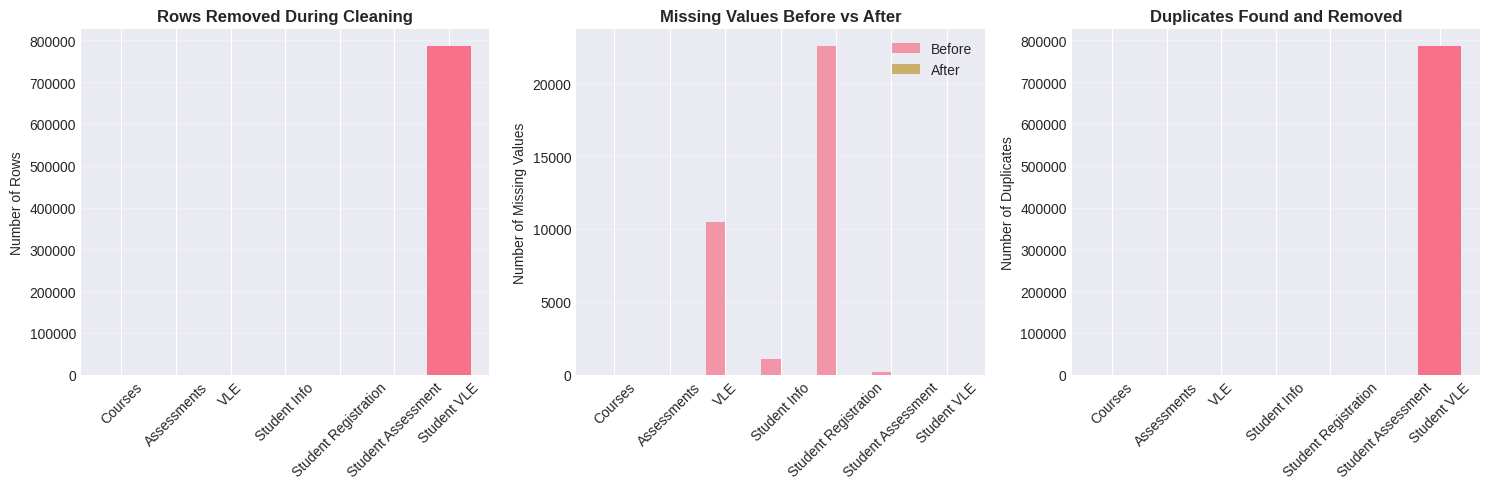


✅ All datasets cleaned and ready for analysis!


In [15]:
# Cell 6: Cleaned Data Overview
print("🔍 DATA OVERVIEW - AFTER CLEANING")
print("="*60)

cleaned_stats = {}
for name, df in cleaned_datasets.items():
    cleaned_stats[name] = {
        'shape': df.shape,
        'missing': df.isnull().sum().sum(),
        'duplicates': df.duplicated().sum(),
        'unique_students': df['id_student'].nunique() if 'id_student' in df.columns else 0
    }
    print(f"\n📁 {name}:")
    print(f"   Shape: {df.shape}")
    print(f"   Missing values: {df.isnull().sum().sum()}")
    print(f"   Duplicates: {df.duplicated().sum()}")
    if 'code_module' in df.columns:
        print(f"   Unique modules: {df['code_module'].nunique()}")
    if 'id_student' in df.columns:
        print(f"   Unique students: {df['id_student'].nunique()}")

# Create comparison table
print("\n" + "="*60)
print("📊 CLEANING SUMMARY")
print("="*60)

summary_data = []
for report in cleaning_reports:
    summary_data.append({
        'Dataset': report['name'],
        'Original Rows': report['original_shape'][0],
        'Cleaned Rows': report['cleaned_shape'][0],
        'Rows Removed': report['rows_removed'],
        'Missing Before': report['original_missing'],
        'Missing After': report['missing_after'],
        'Duplicates Before': report['original_duplicates'],
        'Duplicates After': report['duplicates_after']
    })

summary_df = pd.DataFrame(summary_data)
display(summary_df.style.background_gradient(subset=['Rows Removed', 'Missing Before', 'Missing After'], cmap='RdYlGn_r'))

# Visualize cleaning impact
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Rows removed
axes[0].bar(summary_df['Dataset'], summary_df['Rows Removed'])
axes[0].set_title('Rows Removed During Cleaning', fontweight='bold')
axes[0].set_ylabel('Number of Rows')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# 2. Missing values reduction
x = np.arange(len(summary_df))
width = 0.35
axes[1].bar(x - width/2, summary_df['Missing Before'], width, label='Before', alpha=0.7)
axes[1].bar(x + width/2, summary_df['Missing After'], width, label='After', alpha=0.7)
axes[1].set_title('Missing Values Before vs After', fontweight='bold')
axes[1].set_ylabel('Number of Missing Values')
axes[1].set_xticks(x)
axes[1].set_xticklabels(summary_df['Dataset'], rotation=45)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# 3. Duplicates removed
axes[2].bar(summary_df['Dataset'], summary_df['Duplicates Before'])
axes[2].set_title('Duplicates Found and Removed', fontweight='bold')
axes[2].set_ylabel('Number of Duplicates')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ All datasets cleaned and ready for analysis!")

# Check Data Quality

In [14]:
# Cell 8: Verify Data Quality After Cleaning
print("✅ DATA QUALITY CHECK - AFTER CLEANING")
print("="*60)

# Check for any remaining issues
issues_found = False

for name, df in cleaned_datasets.items():
    print(f"\n🔍 Checking {name}...")
    
    # Check for missing values
    missing_cols = df.columns[df.isnull().any()].tolist()
    if missing_cols:
        print(f"   ⚠️  WARNING: Still missing values in columns: {missing_cols}")
        issues_found = True
    else:
        print(f"   ✓ No missing values")
    
    # Check for duplicates
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"   ⚠️  WARNING: {duplicates} duplicates still exist")
        issues_found = True
    else:
        print(f"   ✓ No duplicates")
    
    # Check data types
    object_cols = df.select_dtypes(include=['object']).columns
    if len(object_cols) > 0:
        print(f"   Object columns: {list(object_cols)}")
    
    # Check for invalid values in key columns
    if 'code_presentation' in df.columns:
        invalid_presentations = df[~df['code_presentation'].str.contains(r'^201[0-9][JB]$', na=False)]
        if len(invalid_presentations) > 0:
            print(f"   ⚠️  Invalid presentation codes: {invalid_presentations['code_presentation'].unique()}")
            issues_found = True
    
    if 'final_result' in df.columns:
        valid_results = ['Pass', 'Fail', 'Withdrawn', 'Distinction']
        invalid_results = df[~df['final_result'].isin(valid_results)]
        if len(invalid_results) > 0:
            print(f"   ⚠️  Invalid final results: {invalid_results['final_result'].unique()}")
            issues_found = True

if not issues_found:
    print("\n🎉 All data quality checks passed! Ready for analysis.")
else:
    print("\n⚠️  Some issues found. Review warnings above.")

print("\n" + "="*60)
print("📊 FINAL DATASET SIZES FOR ANALYSIS")
print("="*60)

final_summary = pd.DataFrame([
    {"Dataset": "Courses", "Rows": courses.shape[0], "Columns": courses.shape[1]},
    {"Dataset": "Assessments", "Rows": assessments.shape[0], "Columns": assessments.shape[1]},
    {"Dataset": "VLE", "Rows": vle.shape[0], "Columns": vle.shape[1]},
    {"Dataset": "Student Info", "Rows": student_info.shape[0], "Columns": student_info.shape[1]},
    {"Dataset": "Student Registration", "Rows": student_reg.shape[0], "Columns": student_reg.shape[1]},
    {"Dataset": "Student Assessment", "Rows": student_assessment.shape[0], "Columns": student_assessment.shape[1]},
    {"Dataset": "Student VLE", "Rows": student_vle.shape[0], "Columns": student_vle.shape[1]}
])

display(final_summary.style.background_gradient(subset=['Rows'], cmap='YlOrBr'))

✅ DATA QUALITY CHECK - AFTER CLEANING

🔍 Checking Courses...
   ✓ No missing values
   ✓ No duplicates
   Object columns: ['code_module', 'code_presentation']

🔍 Checking Assessments...
   ✓ No missing values
   ✓ No duplicates
   Object columns: ['code_module', 'code_presentation', 'assessment_type']

🔍 Checking VLE...
   ✓ No missing values
   ✓ No duplicates
   Object columns: ['code_module', 'code_presentation', 'activity_type']

🔍 Checking Student Info...
   ✓ No missing values
   ✓ No duplicates
   Object columns: ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result']

🔍 Checking Student Registration...
   ✓ No missing values
   ✓ No duplicates
   Object columns: ['code_module', 'code_presentation']

🔍 Checking Student Assessment...
   ✓ No missing values
   ✓ No duplicates

🔍 Checking Student VLE...
   ✓ No missing values
   ✓ No duplicates
   Object columns: ['code_module', 'code_presentation']

🎉 All 

,Dataset,Rows,Columns
0,Courses,22,3
1,Assessments,206,6
2,VLE,6364,6
3,Student Info,32593,13
4,Student Registration,32593,5
5,Student Assessment,173912,5
6,Student VLE,9868110,6


# EDA Analysis

## Target Variable Analysis

🎯 TARGET VARIABLE ANALYSIS


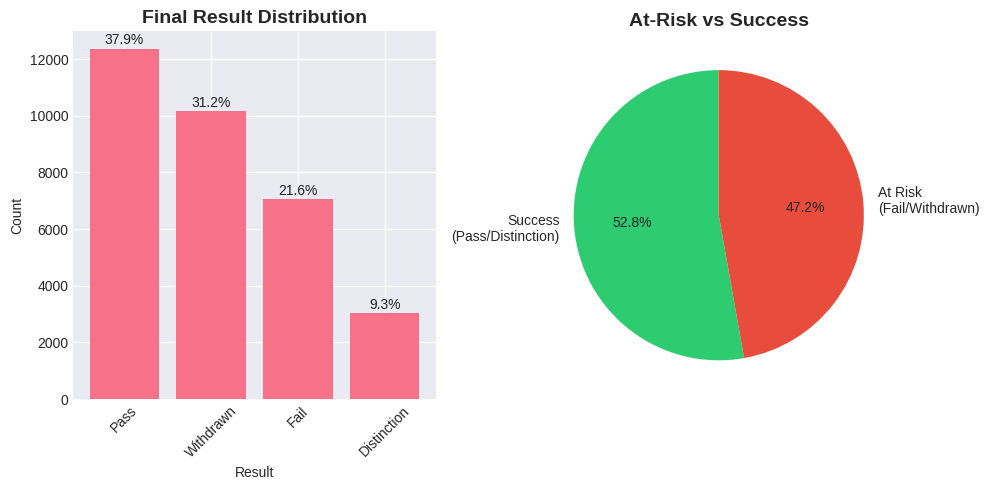


📊 Detailed Breakdown:
final_result
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: count, dtype: int64

✅ Success Rate: 47.2%
⚠️  At-Risk Rate: 52.8%


In [17]:
# Cell 5: Target Variable Analysis
print("🎯 TARGET VARIABLE ANALYSIS")
print("="*60)

# Original final_result distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
result_counts = student_info['final_result'].value_counts()
result_pct = student_info['final_result'].value_counts(normalize=True) * 100
bars = plt.bar(result_counts.index, result_counts.values)
plt.title('Final Result Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Result')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add percentage labels
for i, (count, pct) in enumerate(zip(result_counts.values, result_pct.values)):
    plt.text(i, count + 50, f'{pct:.1f}%', ha='center', va='bottom')

plt.subplot(1, 2, 2)
# Create binary target for classification
student_info['at_risk'] = student_info['final_result'].isin(['Fail', 'Withdrawn']).astype(int)
risk_counts = student_info['at_risk'].value_counts()
risk_labels = ['Success\n(Pass/Distinction)', 'At Risk\n(Fail/Withdrawn)']
colors = ['#2ecc71', '#e74c3c']
plt.pie(risk_counts.values, labels=risk_labels, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('At-Risk vs Success', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Detailed Breakdown:")
print(student_info['final_result'].value_counts())
print(f"\n✅ Success Rate: {(student_info['at_risk'] == 0).mean()*100:.1f}%")
print(f"⚠️  At-Risk Rate: {(student_info['at_risk'] == 1).mean()*100:.1f}%")

#  Demographic Analysis

👥 DEMOGRAPHIC ANALYSIS
Available demographic columns: ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']


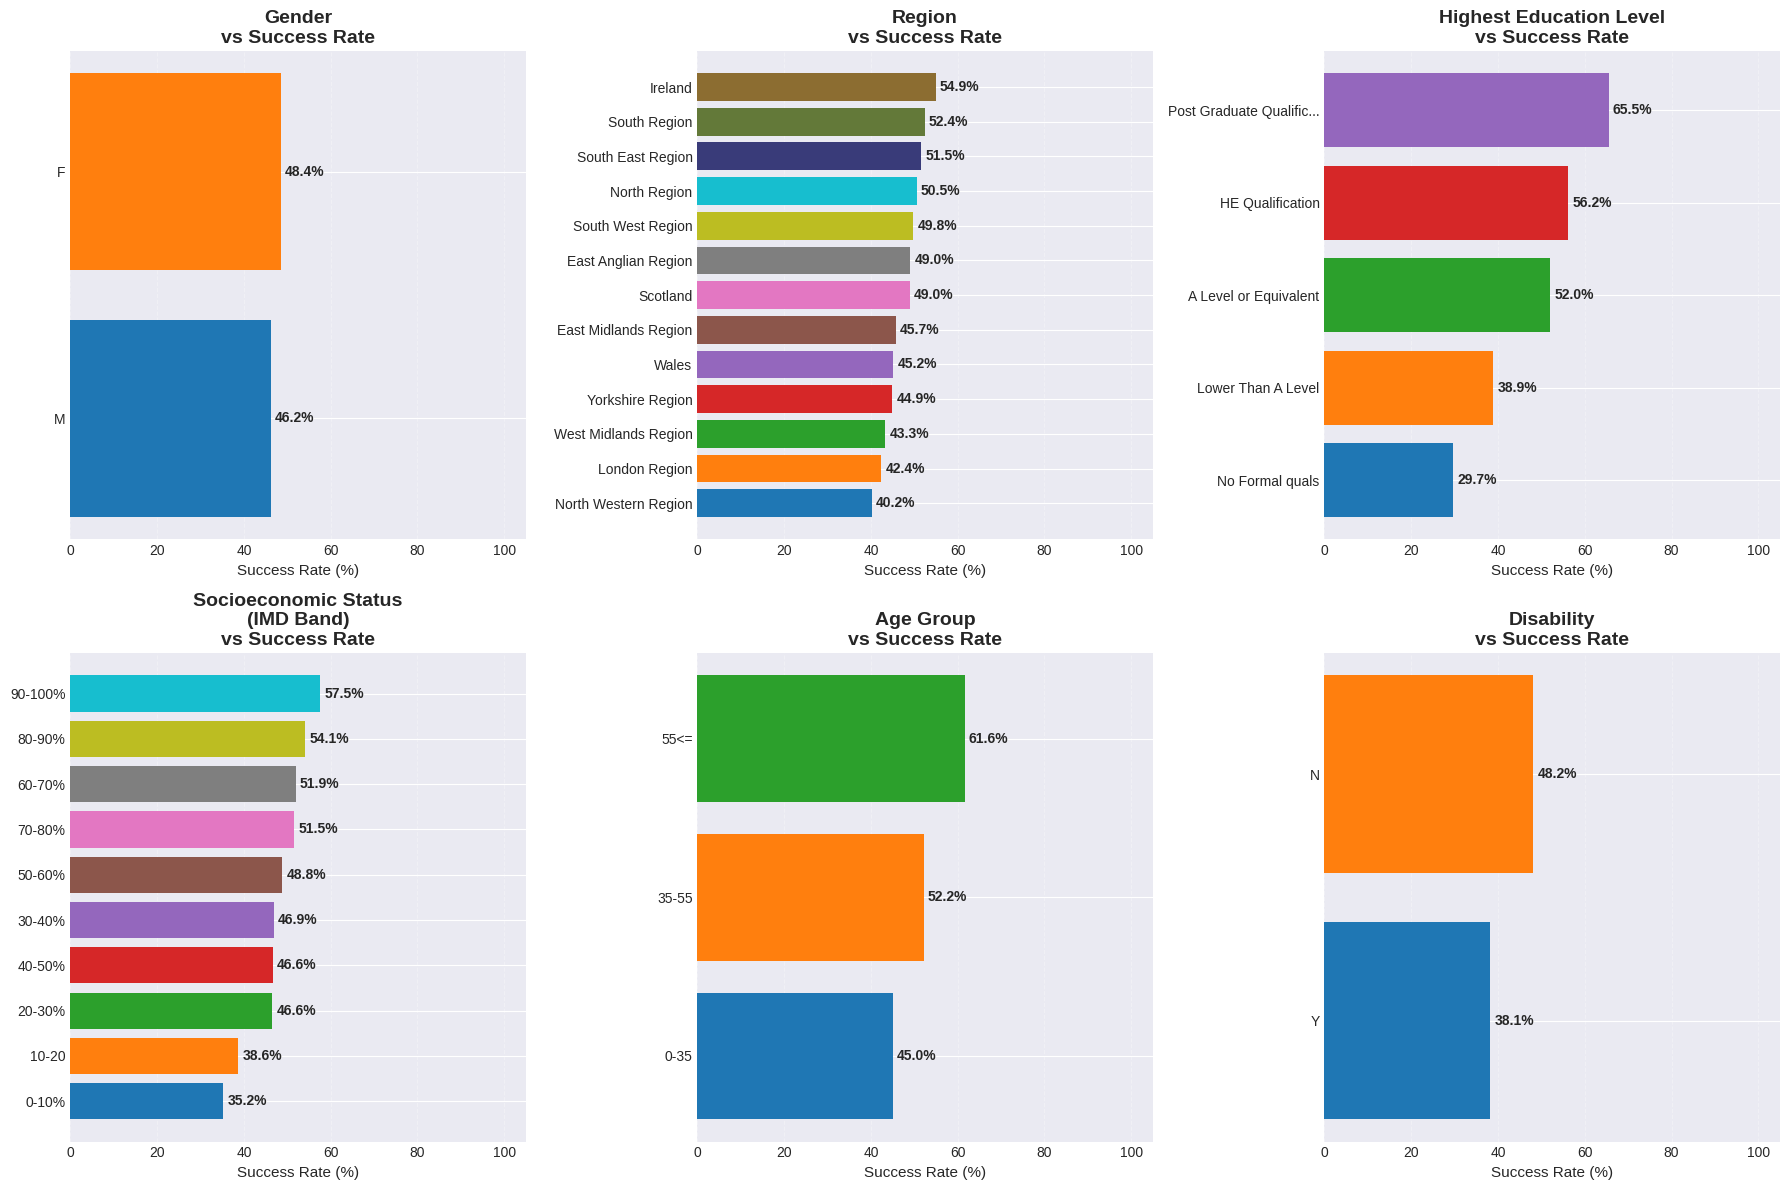


📊 Key Demographic Statistics:

Gender:
--------
  F: 48.4% (n=14,718.0)
  M: 46.2% (n=17,875.0)
  Range: 2.2 percentage points

Region:
--------
  Ireland: 54.9% (n=1,184.0)
  South Region: 52.4% (n=3,092.0)
  South East Region: 51.5% (n=2,111.0)
  North Region: 50.5% (n=1,823.0)
  South West Region: 49.8% (n=2,436.0)
  ... and 8 more groups
  Range: 14.7 percentage points

Highest Education:
-------------------
  Post Graduate Qualification: 65.5% (n=313.0)
  HE Qualification: 56.2% (n=4,730.0)
  A Level or Equivalent: 52.0% (n=14,045.0)
  Lower Than A Level: 38.9% (n=13,158.0)
  No Formal quals: 29.7% (n=347.0)
  Range: 35.8 percentage points

Imd Band:
----------
  90-100%: 57.5% (n=2,536.0)
  80-90%: 54.1% (n=2,762.0)
  60-70%: 51.9% (n=2,905.0)
  70-80%: 51.5% (n=2,879.0)
  50-60%: 48.8% (n=3,124.0)
  ... and 5 more groups
  Range: 22.4 percentage points

Age Band:
----------
  55<=: 61.6% (n=216.0)
  35-55: 52.2% (n=9,433.0)
  0-35: 45.0% (n=22,944.0)
  Range: 16.5 percentage po

In [35]:
 # Cell 6: Demographic Features Analysis (Unique Colors)
print("👥 DEMOGRAPHIC ANALYSIS")
print("="*60)

demographic_cols = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']

# Check which columns exist
available_cols = [col for col in demographic_cols if col in student_info.columns]
print(f"Available demographic columns: {available_cols}")

# Create a vibrant color palette
unique_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252',
    '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39', '#e7ba52',
    '#843c39', '#ad494a', '#d6616b', '#e7969c', '#7b4173',
    '#a55194', '#ce6dbd', '#de9ed6'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(demographic_cols):
    if idx >= len(axes):
        break
    
    ax = axes[idx]
    
    if col not in student_info.columns:
        ax.text(0.5, 0.5, f"Column '{col}' not found", 
                ha='center', va='center', fontsize=12)
        ax.set_title(f"{col.replace('_', ' ').title()}\n(Not Available)", fontsize=14)
        continue
    
    # Calculate success rate by demographic group
    demo_stats = student_info.groupby(col).agg({
        'final_result': lambda x: (x.isin(['Pass', 'Distinction'])).mean() * 100,
        'id_student': 'count'
    }).rename(columns={'final_result': 'success_rate', 'id_student': 'count'})
    
    # Sort by success rate for better visualization
    demo_stats = demo_stats.sort_values('success_rate', ascending=True)
    
    # Create horizontal bar chart with unique colors
    y_pos = np.arange(len(demo_stats))
    
    # Assign a unique color to each bar
    colors = [unique_colors[i % len(unique_colors)] for i in range(len(demo_stats))]
    bars = ax.barh(y_pos, demo_stats['success_rate'].values, color=colors)
    
    # Add percentage labels on the right side of each bar
    for i, bar in enumerate(bars):
        success_rate = demo_stats['success_rate'].iloc[i]
        count = demo_stats['count'].iloc[i]
        
        # Add percentage label
        ax.text(success_rate + 1, i, f'{success_rate:.1f}%', 
                va='center', fontsize=10, fontweight='bold')
    
    ax.set_yticks(y_pos)
    
    # Truncate long labels for better display
    y_labels = []
    for label in demo_stats.index:
        label_str = str(label)
        if len(label_str) > 25:
            y_labels.append(label_str[:22] + '...')
        else:
            y_labels.append(label_str)
    
    ax.set_yticklabels(y_labels, fontsize=10)
    ax.set_xlabel('Success Rate (%)', fontsize=11)
    ax.set_xlim([0, 105])  # Give extra space for labels
    
    # Improve title formatting
    title = col.replace('_', ' ').title()
    if col == 'imd_band':
        title = 'Socioeconomic Status\n(IMD Band)'
    elif col == 'highest_education':
        title = 'Highest Education Level'
    elif col == 'age_band':
        title = 'Age Group'
    
    ax.set_title(f'{title}\nvs Success Rate', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x', linestyle='--')

plt.tight_layout()
plt.show()

print("\n📊 Key Demographic Statistics:")
print("="*40)

# Calculate and display key statistics
for col in available_cols:
    demo_stats = student_info.groupby(col).agg({
        'final_result': lambda x: (x.isin(['Pass', 'Distinction'])).mean() * 100,
        'id_student': 'count'
    }).rename(columns={'final_result': 'success_rate', 'id_student': 'count'})
    
    demo_stats = demo_stats.sort_values('success_rate', ascending=False)
    
    print(f"\n{col.replace('_', ' ').title()}:")
    print("-" * (len(col) + 2))
    
    # Display each group's performance
    for i, (group_name, row) in enumerate(demo_stats.iterrows()):
        if i < 5:  # Show top 5 performing groups
            print(f"  {group_name}: {row['success_rate']:.1f}% (n={row['count']:,})")
    
    if len(demo_stats) > 5:
        print(f"  ... and {len(demo_stats) - 5} more groups")
    
    # Calculate range and disparity
    range_val = demo_stats['success_rate'].max() - demo_stats['success_rate'].min()
    print(f"  Range: {range_val:.1f} percentage points")

# Overall summary
print("\n" + "="*40)
print("📈 DEMOGRAPHIC DIVERSITY OVERVIEW")
print("="*40)

print(f"\nTotal unique demographic combinations:")
for col in available_cols:
    unique_count = student_info[col].nunique()
    print(f"  • {col.replace('_', ' ').title()}: {unique_count} unique values")

# Create a summary visualization
print("\n🎨 Color Legend for Graphs:")
print("-" * 30)
print("Each bar has a unique color to help distinguish")
print("between different demographic groups.")
print("\nThe color variation helps with:")
print("  • Visual differentiation between groups")
print("  • Easier tracking across multiple charts")
print("  • Avoiding color-coded assumptions")

# Temporal & Engagement Analysis

📅 REGISTRATION PATTERNS


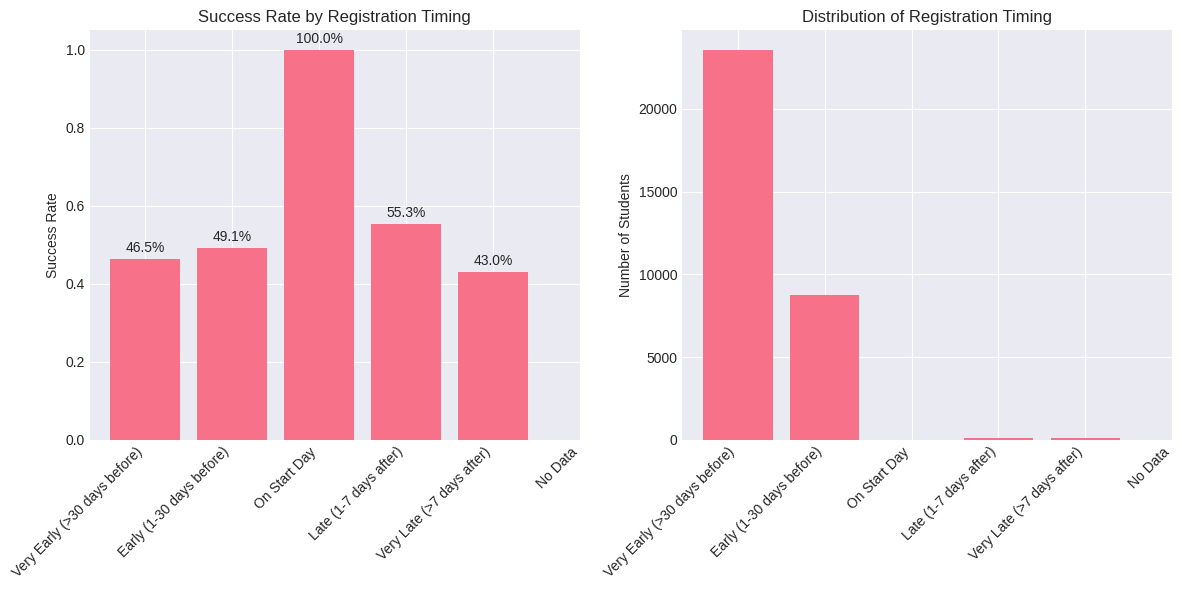


📊 Key Statistics:
Average registration days: -69.4
Median registration days: -57.0
Percentage registering early (before start): 99.3%


In [19]:
# Cell 7: Registration Timing Analysis
print("📅 REGISTRATION PATTERNS")
print("="*60)

# Merge registration with student info
student_with_reg = pd.merge(
    student_info[['code_module', 'code_presentation', 'id_student', 'final_result', 'at_risk']],
    student_reg[['code_module', 'code_presentation', 'id_student', 'date_registration']],
    on=['code_module', 'code_presentation', 'id_student'],
    how='left'
)

# Create registration categories
def categorize_registration(days):
    if pd.isna(days):
        return 'No Data'
    elif days < -30:
        return 'Very Early (>30 days before)'
    elif days < 0:
        return 'Early (1-30 days before)'
    elif days == 0:
        return 'On Start Day'
    elif days <= 7:
        return 'Late (1-7 days after)'
    else:
        return 'Very Late (>7 days after)'

student_with_reg['reg_category'] = student_with_reg['date_registration'].apply(categorize_registration)

# Plot
plt.figure(figsize=(12, 6))

# Success rate by registration category
reg_success = student_with_reg.groupby('reg_category')['at_risk'].mean().sort_index()
categories_order = ['Very Early (>30 days before)', 'Early (1-30 days before)', 
                    'On Start Day', 'Late (1-7 days after)', 'Very Late (>7 days after)', 'No Data']

reg_success = reg_success.reindex(categories_order)

ax = plt.subplot(1, 2, 1)
bars = plt.bar(range(len(reg_success)), 1 - reg_success.values)
plt.xticks(range(len(reg_success)), reg_success.index, rotation=45, ha='right')
plt.ylabel('Success Rate')
plt.title('Success Rate by Registration Timing')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.1%}', ha='center', va='bottom')

# Distribution of registration
ax = plt.subplot(1, 2, 2)
registration_counts = student_with_reg['reg_category'].value_counts().reindex(categories_order)
plt.bar(range(len(registration_counts)), registration_counts.values)
plt.xticks(range(len(registration_counts)), registration_counts.index, rotation=45, ha='right')
plt.ylabel('Number of Students')
plt.title('Distribution of Registration Timing')

plt.tight_layout()
plt.show()

print("\n📊 Key Statistics:")
print(f"Average registration days: {student_with_reg['date_registration'].mean():.1f}")
print(f"Median registration days: {student_with_reg['date_registration'].median():.1f}")
print(f"Percentage registering early (before start): {(student_with_reg['date_registration'] < 0).mean()*100:.1f}%")

## VLE Engagement Patterns

🖱️ VLE ENGAGEMENT ANALYSIS


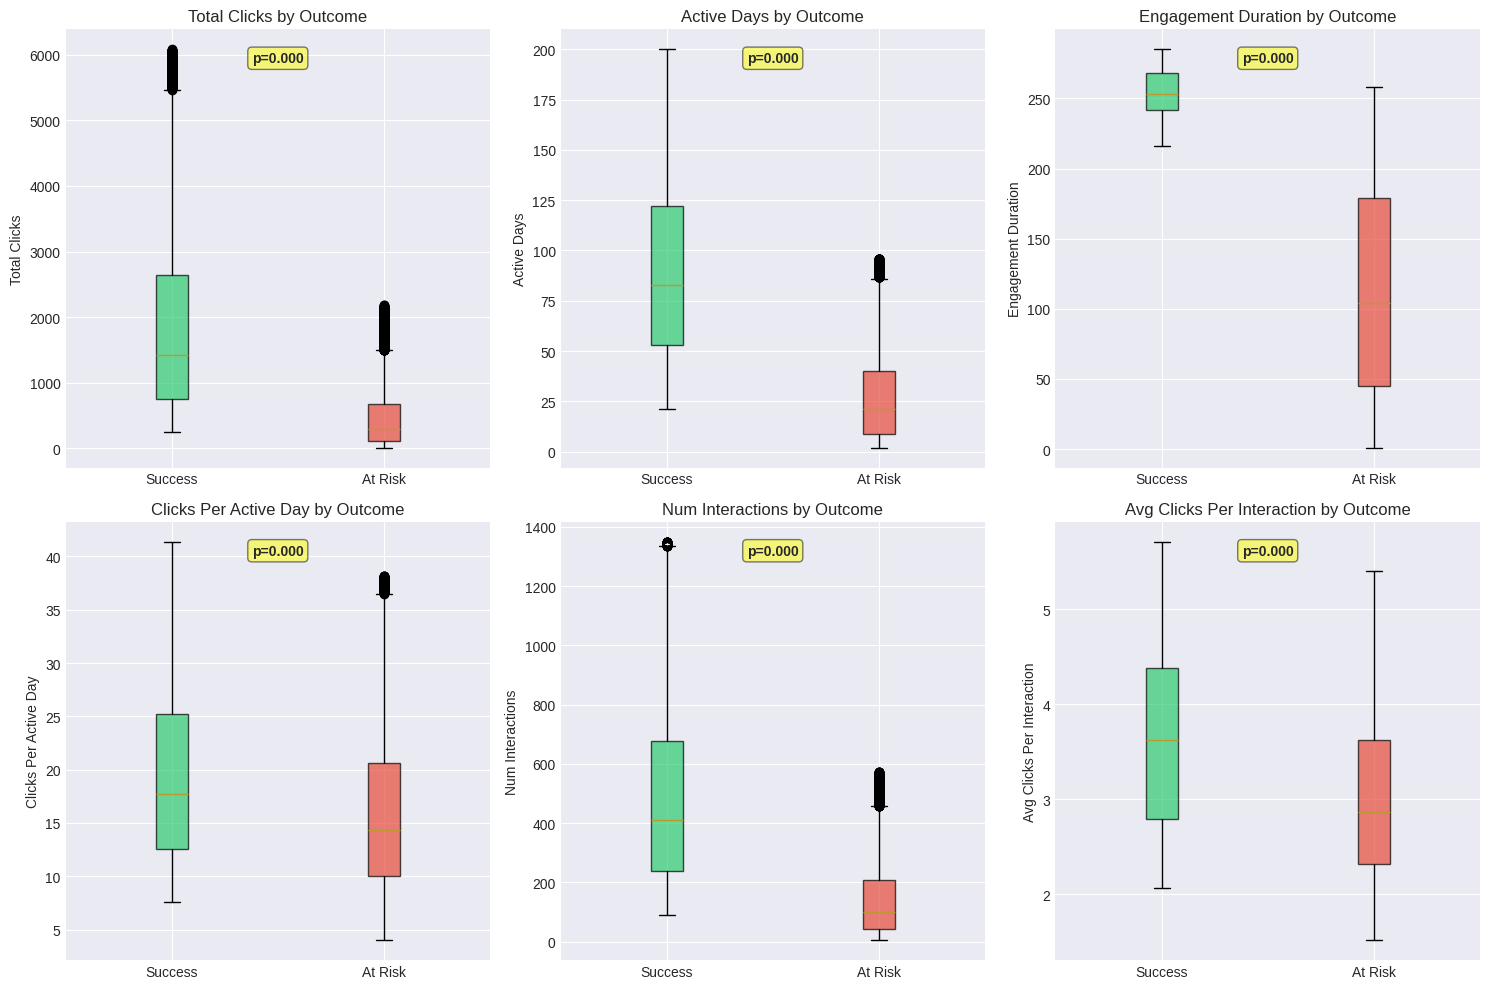

📊 Engagement Statistics:

Success Students:
  Average total clicks: 2113
  Average active days: 94
  Average clicks per day: 20.4

At Risk Students:
  Average total clicks: 602
  Average active days: 31
  Average clicks per day: 17.1


In [21]:
# Cell 8: VLE Engagement Analysis
print("🖱️ VLE ENGAGEMENT ANALYSIS")
print("="*60)

# Merge VLE data with student outcomes
vle_with_outcome = pd.merge(
    student_vle,
    student_info[['code_module', 'code_presentation', 'id_student', 'final_result', 'at_risk']],
    on=['code_module', 'code_presentation', 'id_student'],
    how='left'
)

# Calculate engagement metrics per student
engagement_metrics = vle_with_outcome.groupby(['id_student', 'at_risk']).agg({
    'sum_click': ['sum', 'mean', 'count'],
    'date': ['nunique', 'min', 'max']
}).reset_index()

engagement_metrics.columns = ['id_student', 'at_risk', 
                              'total_clicks', 'avg_clicks_per_interaction',
                              'num_interactions', 'active_days',
                              'first_interaction', 'last_interaction']

engagement_metrics['engagement_duration'] = engagement_metrics['last_interaction'] - engagement_metrics['first_interaction']
engagement_metrics['clicks_per_active_day'] = engagement_metrics['total_clicks'] / engagement_metrics['active_days']

# Plot engagement metrics
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
metrics_to_plot = ['total_clicks', 'active_days', 'engagement_duration',
                   'clicks_per_active_day', 'num_interactions', 'avg_clicks_per_interaction']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 3, idx % 3]
    
    # Create box plots
    data_to_plot = []
    labels = ['Success', 'At Risk']
    
    for risk_level in [0, 1]:
        data = engagement_metrics[engagement_metrics['at_risk'] == risk_level][metric]
        data_to_plot.append(data[data.between(data.quantile(0.05), data.quantile(0.95))])  # Remove outliers
    
    bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
    
    # Color the boxes
    colors = ['#2ecc71', '#e74c3c']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.set_title(f'{metric.replace("_", " ").title()} by Outcome')
    
    # Add statistical significance
    from scipy import stats
    if len(data_to_plot[0]) > 30 and len(data_to_plot[1]) > 30:
        t_stat, p_value = stats.ttest_ind(data_to_plot[0], data_to_plot[1])
        if p_value < 0.05:
            ax.text(0.5, 0.95, f'p={p_value:.3f}', transform=ax.transAxes,
                   ha='center', va='top', fontweight='bold',
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

print("📊 Engagement Statistics:")
for risk_level, label in [(0, 'Success'), (1, 'At Risk')]:
    print(f"\n{label} Students:")
    subset = engagement_metrics[engagement_metrics['at_risk'] == risk_level]
    print(f"  Average total clicks: {subset['total_clicks'].mean():.0f}")
    print(f"  Average active days: {subset['active_days'].mean():.0f}")
    print(f"  Average clicks per day: {subset['clicks_per_active_day'].mean():.1f}")

# Overall Success Patterns

🎯 OVERALL SUCCESS PATTERNS


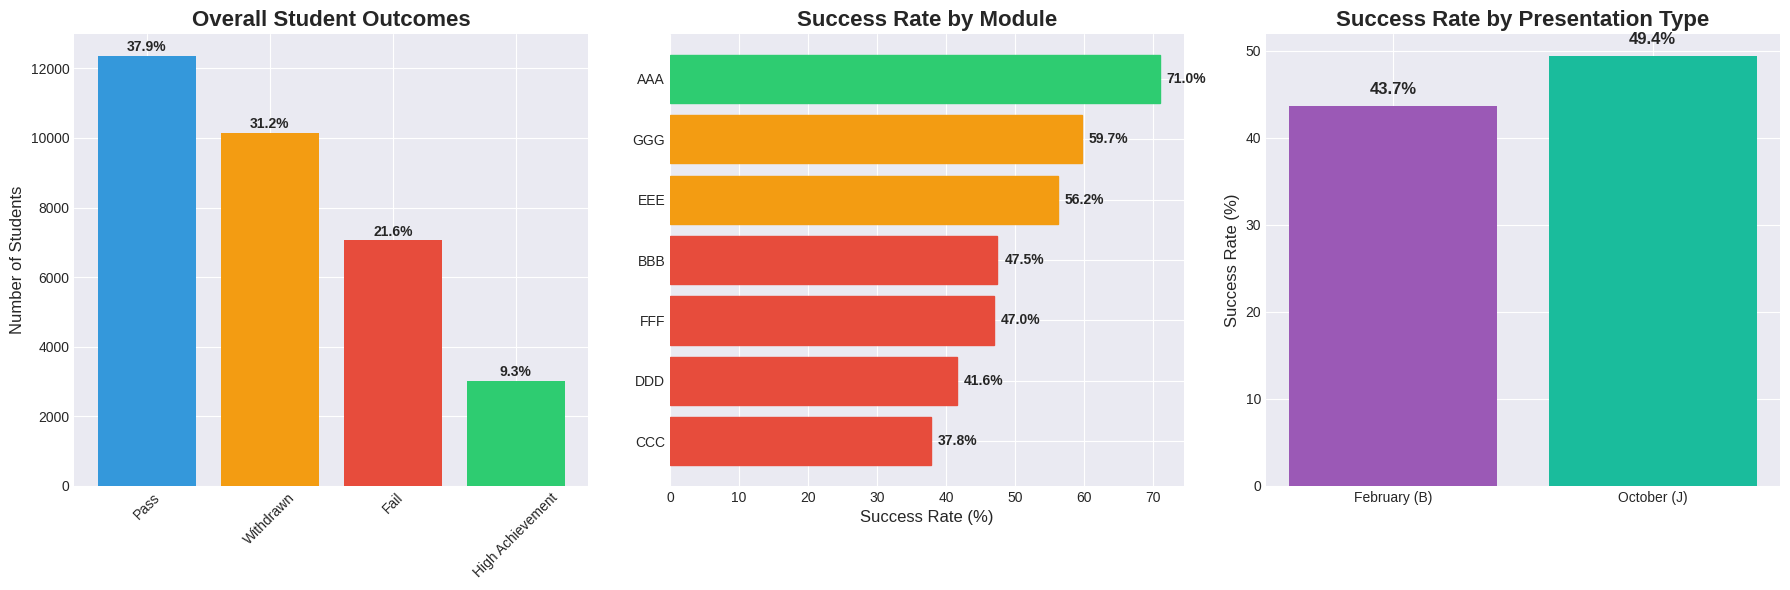


📊 Key Statistics:
Overall success rate (Pass + Distinction): 47.2%
Withdrawal rate: 31.2%
Failure rate: 21.6%


In [23]:
# Cell 3: Overall Success Patterns
print("🎯 OVERALL SUCCESS PATTERNS")
print("="*60)

# Create enhanced target variable
student_info['success_category'] = student_info['final_result'].map({
    'Distinction': 'High Achievement',
    'Pass': 'Pass',
    'Fail': 'Fail',
    'Withdrawn': 'Withdrawn'
})

# Color palette
success_colors = {
    'High Achievement': '#2ecc71',  # Green
    'Pass': '#3498db',              # Blue
    'Fail': '#e74c3c',              # Red
    'Withdrawn': '#f39c12'          # Orange
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Overall distribution
ax1 = axes[0]
result_counts = student_info['success_category'].value_counts()
result_pct = result_counts / len(student_info) * 100

bars = ax1.bar(result_counts.index, result_counts.values, 
              color=[success_colors[r] for r in result_counts.index])
ax1.set_title('Overall Student Outcomes', fontsize=16, fontweight='bold')
ax1.set_ylabel('Number of Students', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Add percentage labels
for i, (count, pct) in enumerate(zip(result_counts.values, result_pct.values)):
    ax1.text(i, count + 50, f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2. Success rate by module
ax2 = axes[1]
module_success = student_info.groupby('code_module')['final_result'].apply(
    lambda x: (x.isin(['Pass', 'Distinction'])).mean() * 100
).sort_values()

bars = ax2.barh(range(len(module_success)), module_success.values)
ax2.set_yticks(range(len(module_success)))
ax2.set_yticklabels(module_success.index)
ax2.set_xlabel('Success Rate (%)', fontsize=12)
ax2.set_title('Success Rate by Module', fontsize=16, fontweight='bold')

# Color bars based on success rate
for i, bar in enumerate(bars):
    success_rate = module_success.iloc[i]
    if success_rate > 70:
        bar.set_color('#2ecc71')
    elif success_rate < 50:
        bar.set_color('#e74c3c')
    else:
        bar.set_color('#f39c12')
    
    ax2.text(success_rate + 1, i, f'{success_rate:.1f}%', 
             va='center', fontweight='bold')

# 3. B vs J presentations
ax3 = axes[2]
student_info['presentation_type'] = student_info['code_presentation'].str[-1]
presentation_success = student_info.groupby('presentation_type')['final_result'].apply(
    lambda x: (x.isin(['Pass', 'Distinction'])).mean() * 100
)

bars = ax3.bar(['February (B)', 'October (J)'], presentation_success.values,
              color=['#9b59b6', '#1abc9c'])
ax3.set_ylabel('Success Rate (%)', fontsize=12)
ax3.set_title('Success Rate by Presentation Type', fontsize=16, fontweight='bold')

# Add value labels
for i, (presentation, rate) in enumerate(zip(['B', 'J'], presentation_success.values)):
    ax3.text(i, rate + 1, f'{rate:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("\n📊 Key Statistics:")
print(f"Overall success rate (Pass + Distinction): {(student_info['final_result'].isin(['Pass', 'Distinction'])).mean()*100:.1f}%")
print(f"Withdrawal rate: {(student_info['final_result'] == 'Withdrawn').mean()*100:.1f}%")
print(f"Failure rate: {(student_info['final_result'] == 'Fail').mean()*100:.1f}%")

# Demographic Patterns

👥 DEMOGRAPHIC PATTERNS & STUDENT SUCCESS


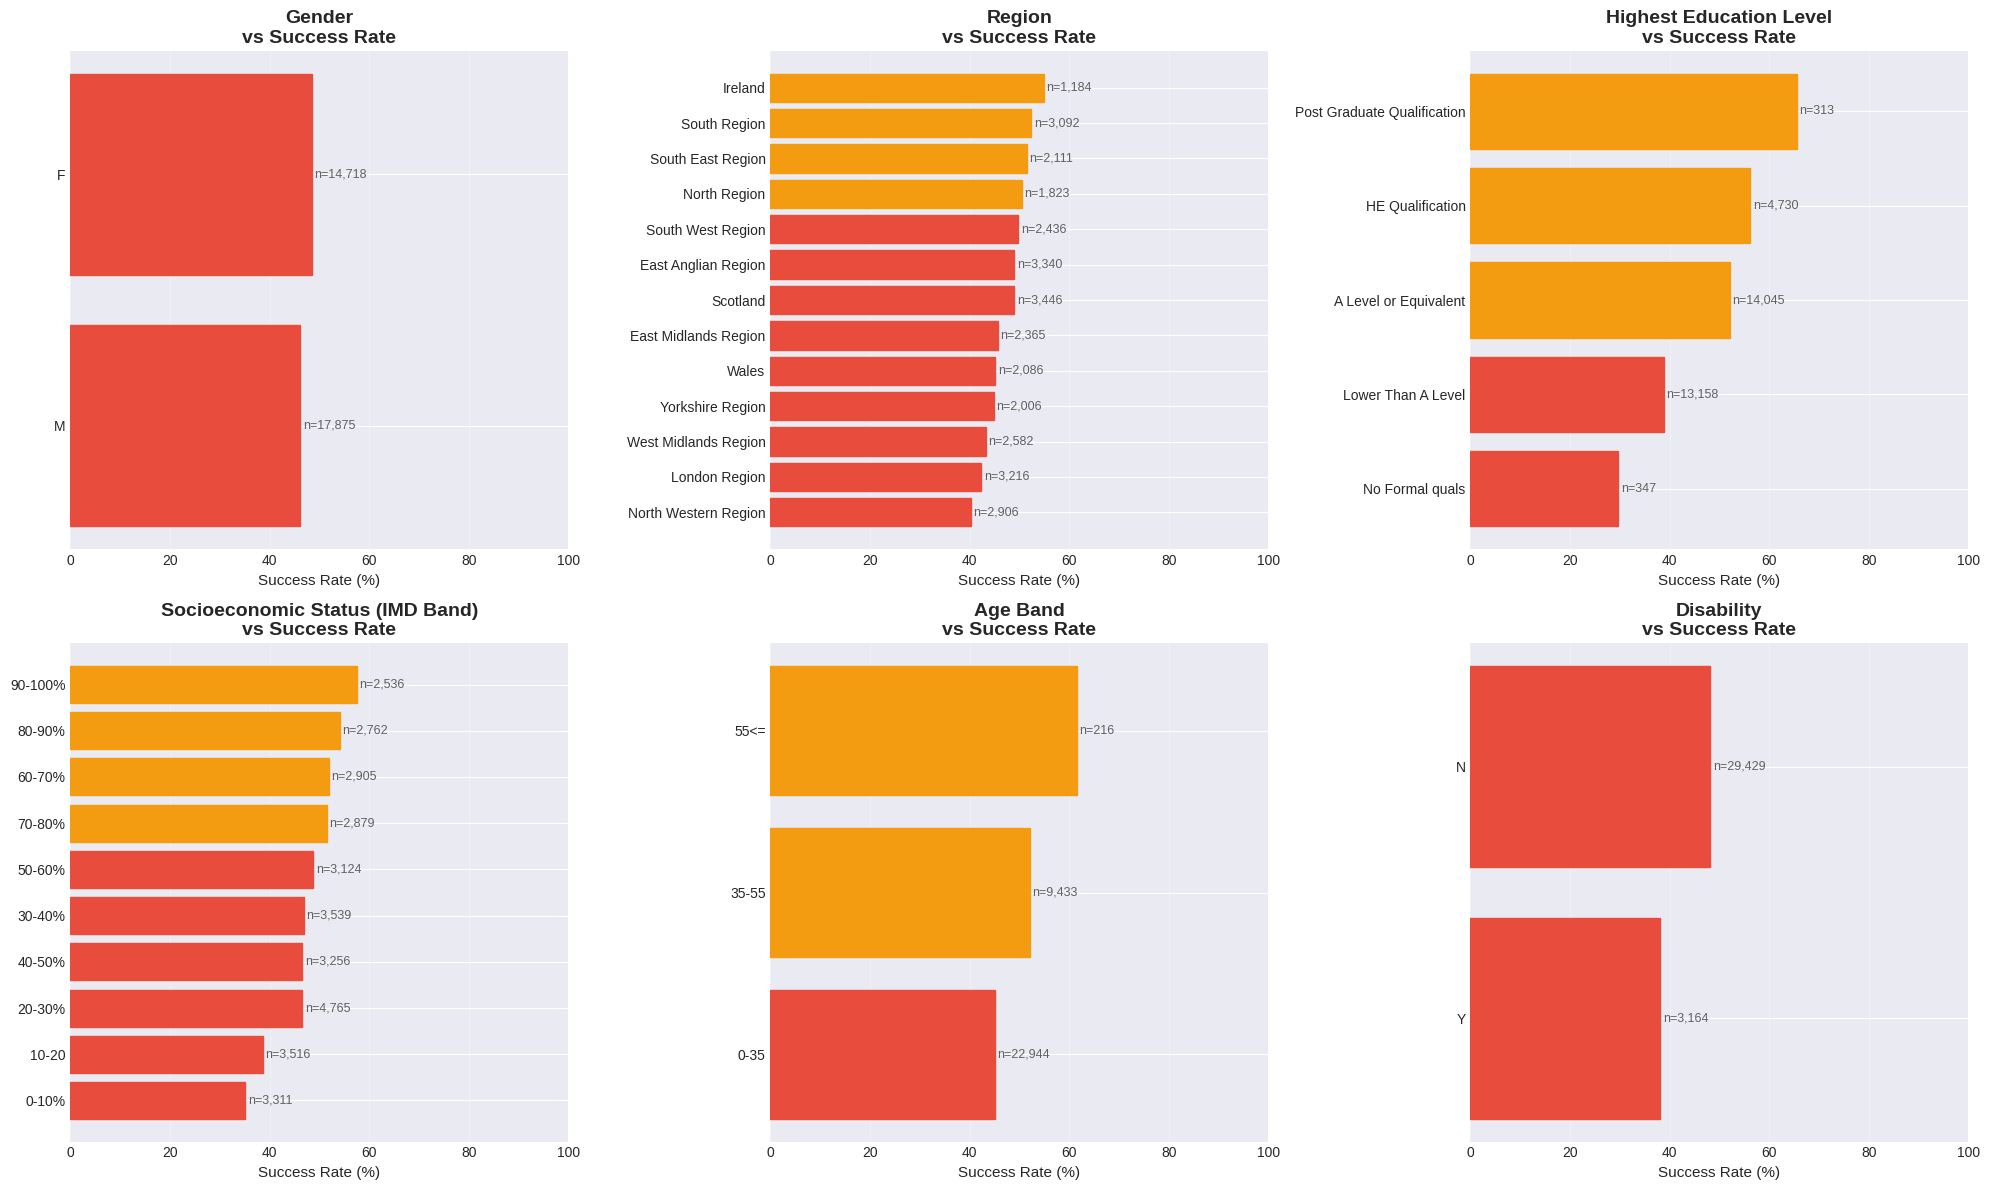


📈 Key Demographic Findings:
----------------------------------------

Gender:
  • Highest success: F (48.4%)
  • Lowest success: M (46.2%)
  • Range: 2.2 percentage points

Region:
  • Highest success: Ireland (54.9%)
  • Lowest success: North Western Region (40.2%)
  • Range: 14.7 percentage points
  ⚠️  Moderate disparity in outcomes

Highest Education:
  • Highest success: Post Graduate Qualification (65.5%)
  • Lowest success: No Formal quals (29.7%)
  • Range: 35.8 percentage points
  ⚠️  LARGE disparity in outcomes!

Imd Band:
  • Highest success: 90-100% (57.5%)
  • Lowest success: 0-10% (35.2%)
  • Range: 22.4 percentage points
  ⚠️  LARGE disparity in outcomes!

Age Band:
  • Highest success: 55<= (61.6%)
  • Lowest success: 0-35 (45.0%)
  • Range: 16.5 percentage points
  ⚠️  Moderate disparity in outcomes

Disability:
  • Highest success: N (48.2%)
  • Lowest success: Y (38.1%)
  • Range: 10.0 percentage points
  ⚠️  Moderate disparity in outcomes


In [24]:
# Cell 4: Demographic Patterns
print("👥 DEMOGRAPHIC PATTERNS & STUDENT SUCCESS")
print("="*60)

demographic_cols = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, col in enumerate(demographic_cols):
    ax = axes[idx]
    
    # Calculate success metrics by demographic group
    demo_analysis = student_info.groupby(col).agg({
        'final_result': lambda x: (x.isin(['Pass', 'Distinction'])).mean() * 100,
        'id_student': 'count'
    }).rename(columns={'final_result': 'success_rate', 'id_student': 'count'})
    
    demo_analysis = demo_analysis.sort_values('success_rate', ascending=True)
    
    # Create horizontal bar chart
    y_pos = np.arange(len(demo_analysis))
    bars = ax.barh(y_pos, demo_analysis['success_rate'].values)
    
    # Color bars based on success rate
    for i, bar in enumerate(bars):
        success_rate = demo_analysis['success_rate'].iloc[i]
        count = demo_analysis['count'].iloc[i]
        
        if success_rate > 70:
            bar.set_color('#2ecc71')  # Green for high success
        elif success_rate < 50:
            bar.set_color('#e74c3c')  # Red for low success
        else:
            bar.set_color('#f39c12')  # Orange for medium
        
        # Add count label
        ax.text(success_rate + 0.5, i, f'n={count:,}', 
                va='center', fontsize=9, alpha=0.7)
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(demo_analysis.index, fontsize=10)
    ax.set_xlabel('Success Rate (%)', fontsize=11)
    
    # Improve title formatting
    title = col.replace('_', ' ').title()
    if col == 'imd_band':
        title = 'Socioeconomic Status (IMD Band)'
    elif col == 'highest_education':
        title = 'Highest Education Level'
    
    ax.set_title(f'{title}\nvs Success Rate', fontsize=14, fontweight='bold')
    ax.set_xlim([0, 100])
    ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n📈 Key Demographic Findings:")
print("-" * 40)

# Calculate and display key statistics
for col in demographic_cols:
    demo_stats = student_info.groupby(col)['final_result'].apply(
        lambda x: (x.isin(['Pass', 'Distinction'])).mean() * 100
    )
    
    highest = demo_stats.idxmax()
    lowest = demo_stats.idxmin()
    range_val = demo_stats.max() - demo_stats.min()
    
    print(f"\n{col.replace('_', ' ').title()}:")
    print(f"  • Highest success: {highest} ({demo_stats.max():.1f}%)")
    print(f"  • Lowest success: {lowest} ({demo_stats.min():.1f}%)")
    print(f"  • Range: {range_val:.1f} percentage points")
    
    if range_val > 20:
        print(f"  ⚠️  LARGE disparity in outcomes!")
    elif range_val > 10:
        print(f"  ⚠️  Moderate disparity in outcomes")

# Engagement vs Success Patterns

🖱️ VLE ENGAGEMENT PATTERNS
Calculating student engagement metrics...
Courses columns: ['code_module', 'code_presentation', 'length']

Available final_result values: <StringArray>
['Pass', 'Withdrawn', 'Fail', 'Distinction']
Length: 4, dtype: str
Creating color scheme for outcomes: <StringArray>
['Pass', 'Withdrawn', 'Fail', 'Distinction']
Length: 4, dtype: str
Color mapping: {'Pass': '#2ecc71', 'Withdrawn': '#3498db', 'Fail': '#e74c3c', 'Distinction': '#f39c12'}

Outcome order (by frequency): ['Pass', 'Withdrawn', 'Fail', 'Distinction']


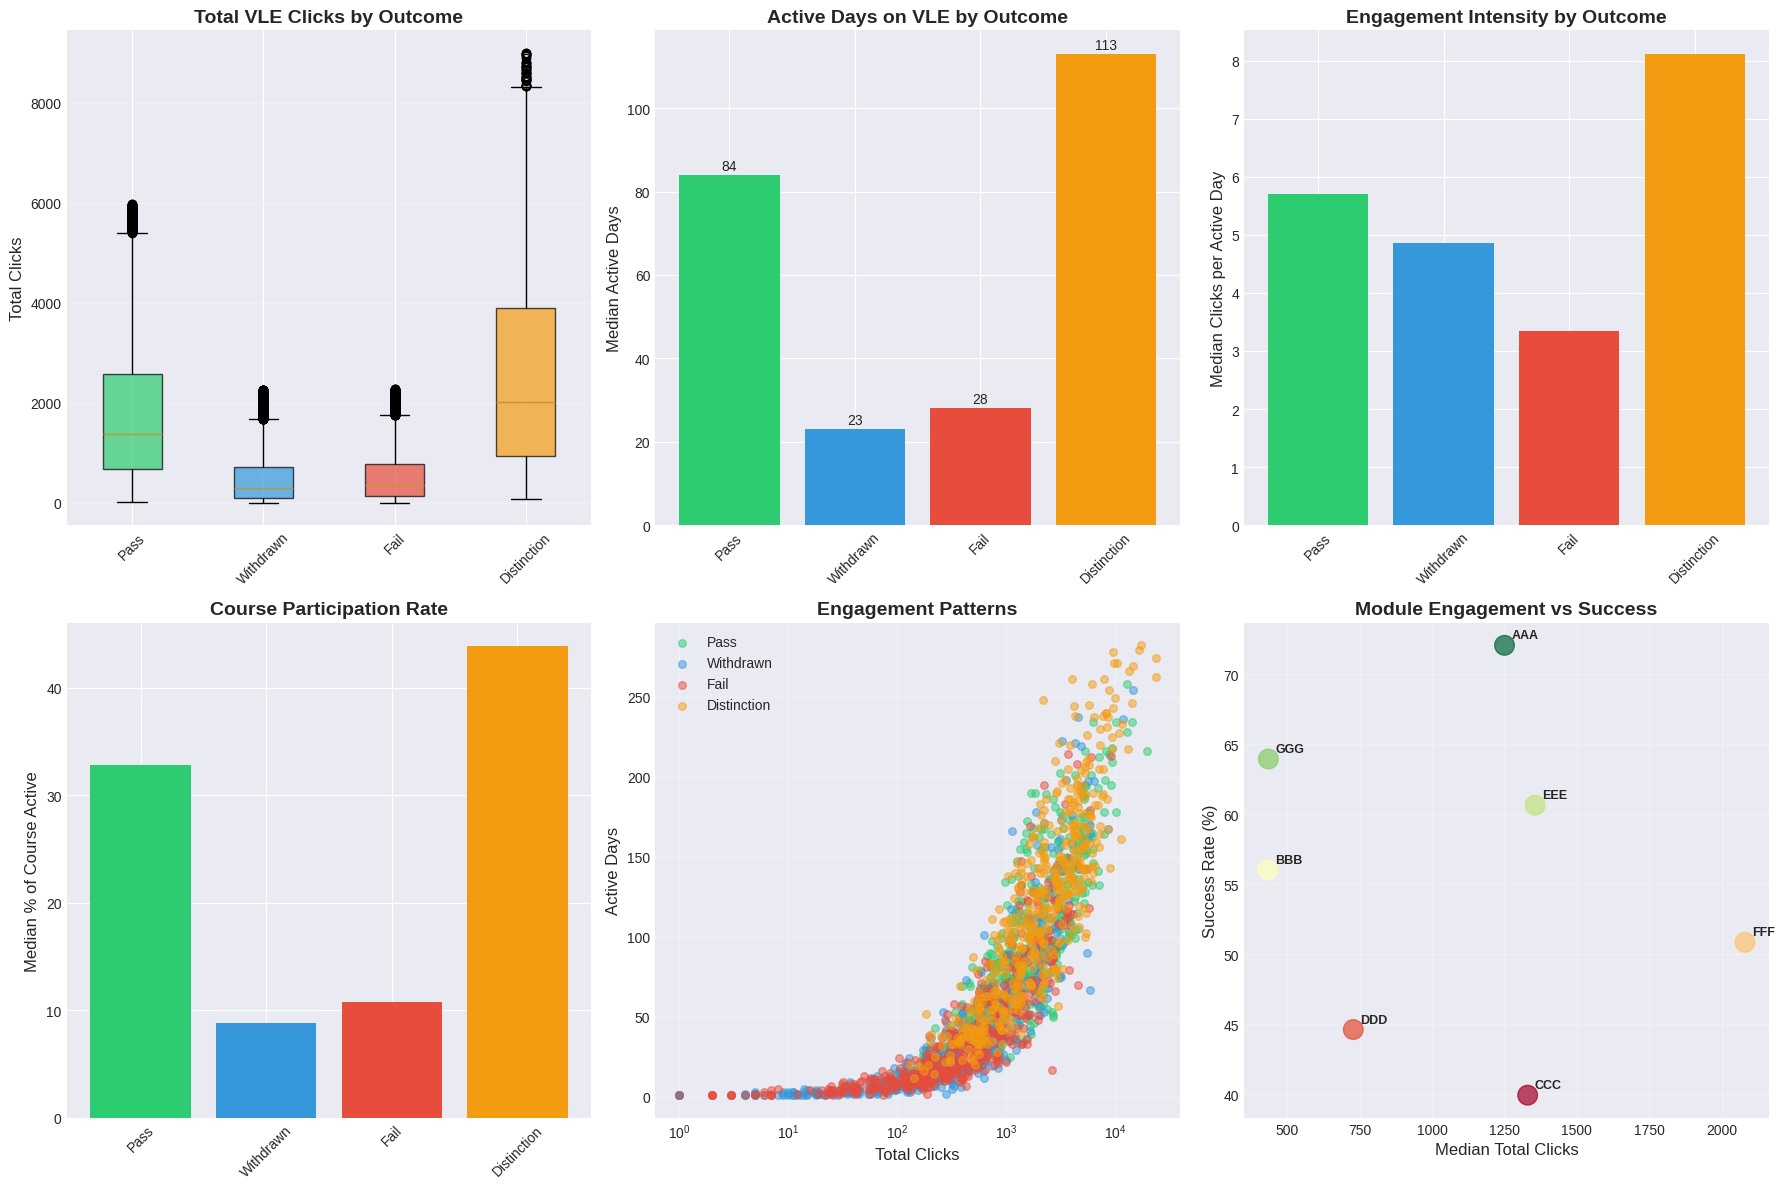


📊 Engagement Statistics by Outcome:
--------------------------------------------------

Pass (n=12,358):
  • Median total clicks: 1,452
  • Median active days: 84
  • Median engagement rate: 32.8%

Withdrawn (n=7,640):
  • Median total clicks: 353
  • Median active days: 23
  • Median engagement rate: 8.8%

Fail (n=6,719):
  • Median total clicks: 403
  • Median active days: 28
  • Median engagement rate: 10.8%

Distinction (n=3,024):
  • Median total clicks: 2,129
  • Median active days: 113
  • Median engagement rate: 43.9%


In [29]:
# Cell 5: Engagement vs Success Patterns
print("🖱️ VLE ENGAGEMENT PATTERNS")
print("="*60)

# Calculate engagement metrics per student
print("Calculating student engagement metrics...")

# First, let's check what columns we have in courses
print("Courses columns:", courses.columns.tolist())

# Check if 'module_presentation_length' exists (common alternative name)
if 'module_presentation_length' in courses.columns:
    courses = courses.rename(columns={'module_presentation_length': 'length'})
    print("Renamed 'module_presentation_length' to 'length'")
elif 'length' not in courses.columns:
    # Create a placeholder based on presentation type
    print("Creating course length approximation...")
    courses['length'] = courses['code_presentation'].apply(
        lambda x: 240 if str(x)[-1] == 'B' else 240  # Assuming 240 days for both
    )

# Check what outcomes we actually have
print("\nAvailable final_result values:", student_info['final_result'].unique())

# Define color scheme based on ACTUAL outcomes
unique_outcomes = student_info['final_result'].unique()
print("Creating color scheme for outcomes:", unique_outcomes)

# Create color mapping
outcome_colors = {}
color_palette = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6', '#1abc9c']
for i, outcome in enumerate(unique_outcomes):
    outcome_colors[outcome] = color_palette[i % len(color_palette)]

print("Color mapping:", outcome_colors)

engagement_metrics = student_vle.groupby('id_student').agg({
    'sum_click': ['sum', 'mean', 'count'],
    'date': ['nunique', 'min', 'max']
}).reset_index()

engagement_metrics.columns = ['id_student', 'total_clicks', 'avg_clicks_per_interaction',
                              'num_interactions', 'active_days', 'first_interaction', 
                              'last_interaction']

# Add course info and outcomes
engagement_metrics = engagement_metrics.merge(
    student_info[['id_student', 'code_module', 'code_presentation', 'final_result']],
    on='id_student',
    how='inner'
).merge(
    courses[['code_module', 'code_presentation', 'length']],
    on=['code_module', 'code_presentation'],
    how='left'
)

# Handle missing lengths
if engagement_metrics['length'].isnull().any():
    median_length = engagement_metrics['length'].median()
    engagement_metrics['length'] = engagement_metrics['length'].fillna(median_length)
    print(f"Filled missing course lengths with median: {median_length}")

# Calculate additional metrics
engagement_metrics['engagement_duration'] = engagement_metrics['last_interaction'] - engagement_metrics['first_interaction']
engagement_metrics['clicks_per_day'] = engagement_metrics['total_clicks'] / engagement_metrics['engagement_duration'].clip(lower=1)
engagement_metrics['engagement_rate'] = engagement_metrics['active_days'] / engagement_metrics['length']

# Get actual outcome order by count
outcome_counts = engagement_metrics['final_result'].value_counts()
actual_outcome_order = outcome_counts.index.tolist()
print(f"\nOutcome order (by frequency): {actual_outcome_order}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Total Clicks Distribution
ax1 = axes[0, 0]
data_to_plot = []

for outcome in actual_outcome_order:
    subset = engagement_metrics[engagement_metrics['final_result'] == outcome]['total_clicks']
    if len(subset) > 0:
        # Remove outliers for better visualization
        q1 = subset.quantile(0.25)
        q3 = subset.quantile(0.75)
        iqr = q3 - q1
        subset_clean = subset[(subset >= q1 - 1.5*iqr) & (subset <= q3 + 1.5*iqr)]
        data_to_plot.append(subset_clean)
    else:
        data_to_plot.append(pd.Series([0]))

bp = ax1.boxplot(data_to_plot, labels=actual_outcome_order, patch_artist=True)
colors = [outcome_colors.get(outcome, '#000000') for outcome in actual_outcome_order]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_ylabel('Total Clicks', fontsize=12)
ax1.set_title('Total VLE Clicks by Outcome', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.tick_params(axis='x', rotation=45)

# 2. Active Days
ax2 = axes[0, 1]
active_days_by_outcome = engagement_metrics.groupby('final_result')['active_days'].median().reindex(actual_outcome_order)
bars = ax2.bar(range(len(active_days_by_outcome)), active_days_by_outcome.values,
              color=[outcome_colors.get(outcome, '#000000') for outcome in actual_outcome_order])
ax2.set_xticks(range(len(active_days_by_outcome)))
ax2.set_xticklabels(actual_outcome_order, rotation=45)
ax2.set_ylabel('Median Active Days', fontsize=12)
ax2.set_title('Active Days on VLE by Outcome', fontsize=14, fontweight='bold')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    if not pd.isna(height):
        ax2.text(i, height + 0.5, f'{height:.0f}', ha='center', va='bottom')

# 3. Clicks Per Day
ax3 = axes[0, 2]
clicks_per_day_by_outcome = engagement_metrics.groupby('final_result')['clicks_per_day'].median().reindex(actual_outcome_order)
bars = ax3.bar(range(len(clicks_per_day_by_outcome)), clicks_per_day_by_outcome.values,
              color=[outcome_colors.get(outcome, '#000000') for outcome in actual_outcome_order])
ax3.set_xticks(range(len(clicks_per_day_by_outcome)))
ax3.set_xticklabels(actual_outcome_order, rotation=45)
ax3.set_ylabel('Median Clicks per Active Day', fontsize=12)
ax3.set_title('Engagement Intensity by Outcome', fontsize=14, fontweight='bold')

# 4. Engagement Rate
ax4 = axes[1, 0]
engagement_metrics['engagement_pct'] = (engagement_metrics['active_days'] / engagement_metrics['length']) * 100
engagement_by_outcome = engagement_metrics.groupby('final_result')['engagement_pct'].median().reindex(actual_outcome_order)
bars = ax4.bar(range(len(engagement_by_outcome)), engagement_by_outcome.values,
              color=[outcome_colors.get(outcome, '#000000') for outcome in actual_outcome_order])
ax4.set_xticks(range(len(engagement_by_outcome)))
ax4.set_xticklabels(actual_outcome_order, rotation=45)
ax4.set_ylabel('Median % of Course Active', fontsize=12)
ax4.set_title('Course Participation Rate', fontsize=14, fontweight='bold')

# 5. Scatter: Clicks vs Active Days
ax5 = axes[1, 1]
for outcome in actual_outcome_order[:4]:  # Limit to first 4 outcomes for clarity
    subset = engagement_metrics[engagement_metrics['final_result'] == outcome]
    if len(subset) > 0:
        sample_size = min(500, len(subset))
        subset_sample = subset.sample(sample_size) if len(subset) > sample_size else subset
        ax5.scatter(subset_sample['total_clicks'], subset_sample['active_days'],
                   alpha=0.5, s=30, label=outcome, color=outcome_colors.get(outcome, '#000000'))

ax5.set_xlabel('Total Clicks', fontsize=12)
ax5.set_ylabel('Active Days', fontsize=12)
ax5.set_title('Engagement Patterns', fontsize=14, fontweight='bold')
ax5.legend()
ax5.set_xscale('log')
ax5.grid(True, alpha=0.3)

# 6. Engagement by Module
ax6 = axes[1, 2]
module_engagement = engagement_metrics.groupby('code_module').agg({
    'total_clicks': 'median',
    'final_result': lambda x: (x.isin(['Pass', 'Distinction'])).mean() * 100
}).reset_index()

scatter = ax6.scatter(module_engagement['total_clicks'], module_engagement['final_result'],
                     s=200, alpha=0.7, cmap='RdYlGn', c=module_engagement['final_result'])

# Add module labels
for i, row in module_engagement.iterrows():
    ax6.annotate(row['code_module'], (row['total_clicks'], row['final_result']),
                xytext=(5, 5), textcoords='offset points', fontsize=9, fontweight='bold')

ax6.set_xlabel('Median Total Clicks', fontsize=12)
ax6.set_ylabel('Success Rate (%)', fontsize=12)
ax6.set_title('Module Engagement vs Success', fontsize=14, fontweight='bold')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Engagement Statistics by Outcome:")
print("-" * 50)
for outcome in actual_outcome_order:
    subset = engagement_metrics[engagement_metrics['final_result'] == outcome]
    if len(subset) > 0:
        print(f"\n{outcome} (n={len(subset):,}):")
        print(f"  • Median total clicks: {subset['total_clicks'].median():,.0f}")
        print(f"  • Median active days: {subset['active_days'].median():.0f}")
        print(f"  • Median engagement rate: {(subset['active_days'] / subset['length']).median()*100:.1f}%")

# Assesment Patterns

📝 ASSESSMENT PERFORMANCE PATTERNS
Merging assessment data...
Available assessment types: <StringArray>
['TMA', 'CMA', 'Exam']
Length: 3, dtype: str
Available final_result values: <StringArray>
['Pass', 'Withdrawn', 'Fail', 'Distinction']
Length: 4, dtype: str

Actual outcomes in assessment data: <StringArray>
['Pass', 'Withdrawn', 'Fail', 'Distinction']
Length: 4, dtype: str
Color mapping: {'Pass': '#2ecc71', 'Withdrawn': '#3498db', 'Fail': '#e74c3c', 'Distinction': '#f39c12'}
Assessment types for plotting: <StringArray>
['TMA', 'CMA', 'Exam']
Length: 3, dtype: str


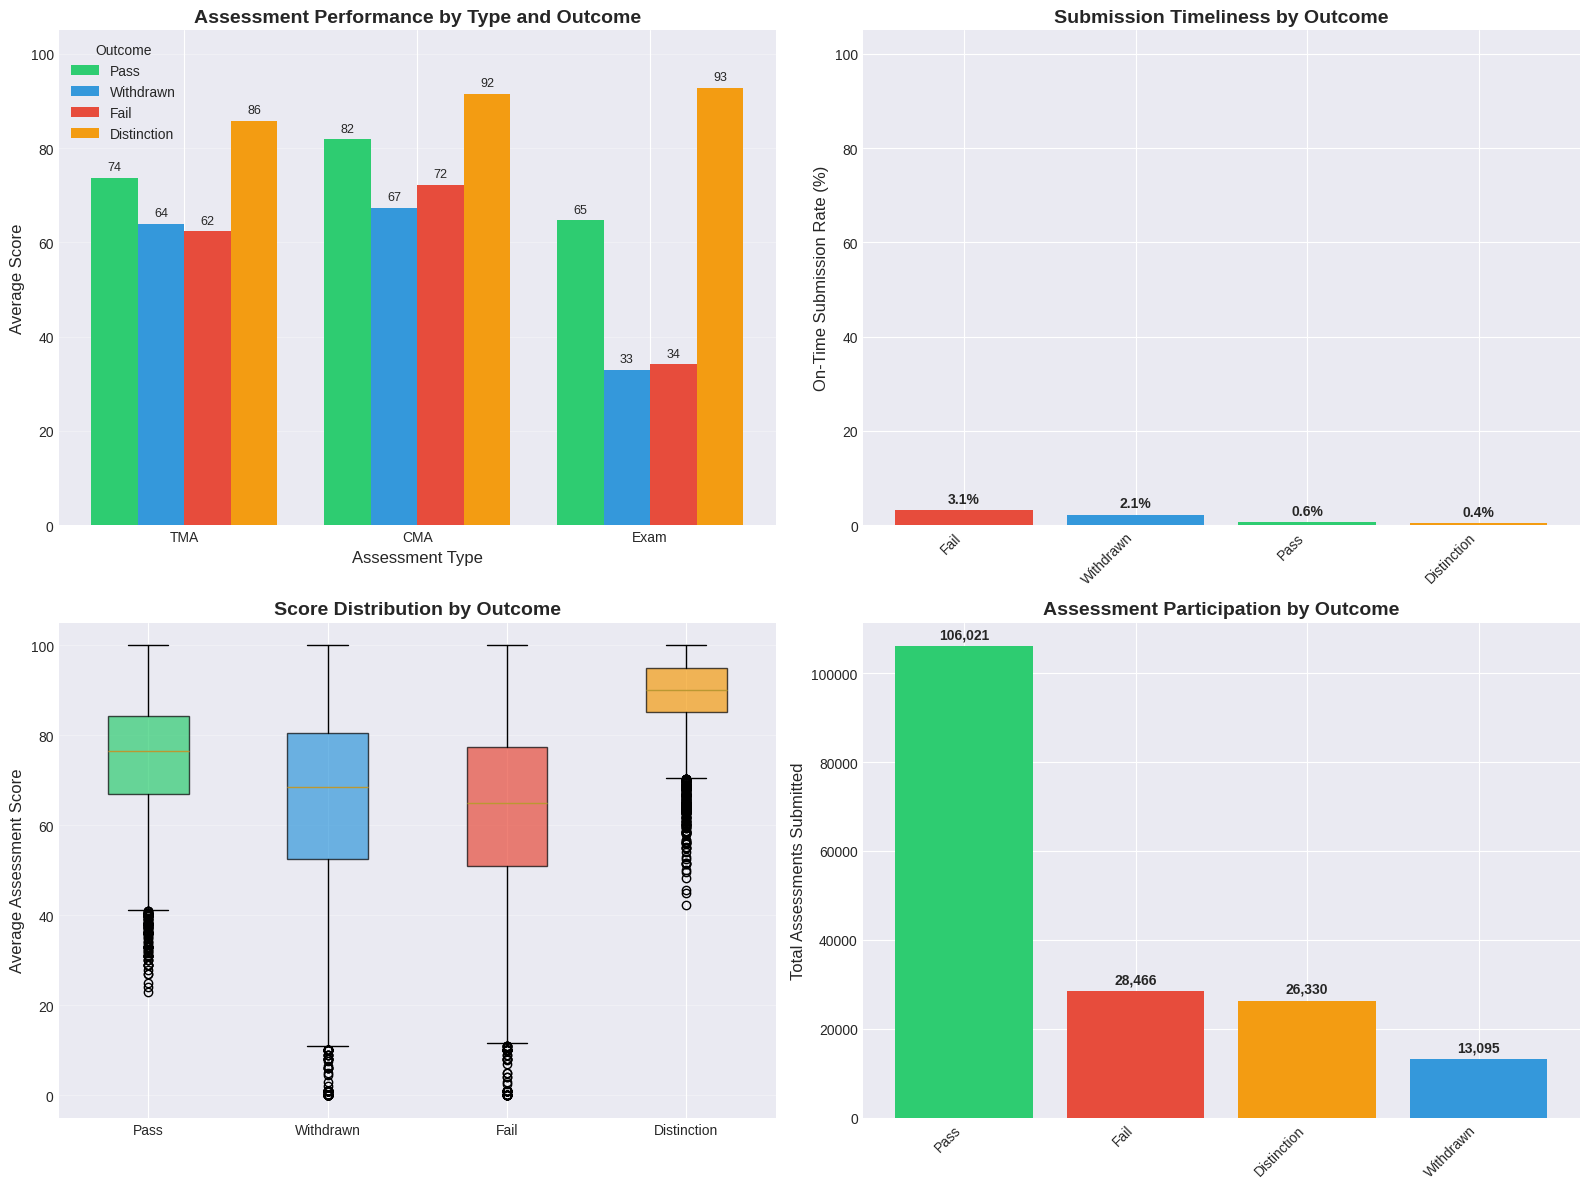


📊 Assessment Performance Insights:
----------------------------------------

TMA Assessments:
  • Pass (n=11,725):
    Avg score = 73.7
    On-time rate = 0.7%
  • Withdrawn (n=3,912):
    Avg score = 64.0
    On-time rate = 2.4%
  • Fail (n=5,422):
    Avg score = 62.3
    On-time rate = 3.5%
  • Distinction (n=2,817):
    Avg score = 85.8
    On-time rate = 0.5%

CMA Assessments:
  • Pass (n=7,692):
    Avg score = 81.9
    On-time rate = 0.5%
  • Withdrawn (n=2,143):
    Avg score = 67.3
    On-time rate = 1.6%
  • Fail (n=2,913):
    Avg score = 72.2
    On-time rate = 3.1%
  • Distinction (n=2,075):
    Avg score = 91.6
    On-time rate = 0.4%

Exam Assessments:
  • Pass (n=3,237):
    Avg score = 64.6
    On-time rate = 0.0%
  • Withdrawn (n=1):
    Avg score = 33.0
    On-time rate = 0.0%
  • Fail (n=670):
    Avg score = 34.1
    On-time rate = 0.0%
  • Distinction (n=825):
    Avg score = 92.7
    On-time rate = 0.0%

📈 Overall Assessment Statistics:
-------------------------

In [31]:
# Cell 7: Assessment Patterns
print("📝 ASSESSMENT PERFORMANCE PATTERNS")
print("="*60)

# Merge assessment data with student info
print("Merging assessment data...")
assessment_with_info = pd.merge(
    student_assessment,
    assessments[['id_assessment', 'code_module', 'code_presentation', 'assessment_type']],
    on='id_assessment',
    how='inner'
).merge(
    student_info[['code_module', 'code_presentation', 'id_student', 'final_result']],
    on=['code_module', 'code_presentation', 'id_student'],
    how='inner'
)

# Check what assessment types we have
print("Available assessment types:", assessment_with_info['assessment_type'].unique())
print("Available final_result values:", assessment_with_info['final_result'].unique())

# Calculate assessment metrics
assessment_summary = assessment_with_info.groupby(['id_student', 'final_result', 'assessment_type']).agg({
    'score': ['mean', 'count', 'std'],
    'date_submitted': lambda x: (x <= 0).mean()  # Submitted on time
}).reset_index()

assessment_summary.columns = ['id_student', 'final_result', 'assessment_type',
                              'avg_score', 'num_assessments', 'score_std', 'on_time_rate']

# Get actual outcomes from the data
actual_outcomes = assessment_summary['final_result'].unique()
print(f"\nActual outcomes in assessment data: {actual_outcomes}")

# Create color mapping for actual outcomes
color_palette = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6', '#1abc9c']
outcome_colors = {}
for i, outcome in enumerate(actual_outcomes):
    outcome_colors[outcome] = color_palette[i % len(color_palette)]

print("Color mapping:", outcome_colors)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Average Score by Assessment Type and Outcome
ax1 = axes[0, 0]
assessment_types = assessment_summary['assessment_type'].unique()
print(f"Assessment types for plotting: {assessment_types}")

# Create grouped bar chart
x = np.arange(len(assessment_types))
width = 0.2

# Use actual outcomes, limit to 4 for clarity
outcomes_to_plot = actual_outcomes[:4] if len(actual_outcomes) >= 4 else actual_outcomes

for i, outcome in enumerate(outcomes_to_plot):
    subset = assessment_summary[assessment_summary['final_result'] == outcome]
    scores_by_type = subset.groupby('assessment_type')['avg_score'].mean().reindex(assessment_types).fillna(0)
    offset = (i - (len(outcomes_to_plot)-1)/2) * width
    
    bars = ax1.bar(x + offset, scores_by_type.values, width, 
                   label=outcome, color=outcome_colors.get(outcome, '#000000'))
    
    # Add value labels
    for j, score in enumerate(scores_by_type.values):
        if not pd.isna(score) and score > 0:
            ax1.text(x[j] + offset, score + 1, f'{score:.0f}', 
                    ha='center', va='bottom', fontsize=9)

ax1.set_xlabel('Assessment Type', fontsize=12)
ax1.set_ylabel('Average Score', fontsize=12)
ax1.set_title('Assessment Performance by Type and Outcome', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(assessment_types)
ax1.legend(title='Outcome')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim(0, 105)

# 2. Submission Timeliness
ax2 = axes[0, 1]
on_time_by_outcome = assessment_summary.groupby('final_result')['on_time_rate'].mean() * 100

# Sort by on-time rate for better visualization
on_time_by_outcome = on_time_by_outcome.sort_values(ascending=False)

bars = ax2.bar(range(len(on_time_by_outcome)), on_time_by_outcome.values,
              color=[outcome_colors.get(outcome, '#000000') for outcome in on_time_by_outcome.index])

ax2.set_xticks(range(len(on_time_by_outcome)))
ax2.set_xticklabels(on_time_by_outcome.index, rotation=45, ha='right')
ax2.set_ylabel('On-Time Submission Rate (%)', fontsize=12)
ax2.set_title('Submission Timeliness by Outcome', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 105)

# Add value labels
for i, (outcome, rate) in enumerate(zip(on_time_by_outcome.index, on_time_by_outcome.values)):
    ax2.text(i, rate + 1, f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Score Distribution
ax3 = axes[1, 0]
score_data = []
score_labels = []

# Use actual outcomes for score distribution
for outcome in actual_outcomes:
    subset = assessment_summary[assessment_summary['final_result'] == outcome]['avg_score']
    if len(subset.dropna()) > 0:
        score_data.append(subset.dropna())
        score_labels.append(outcome)

if len(score_data) > 0:
    bp = ax3.boxplot(score_data, labels=score_labels, patch_artist=True)
    colors = [outcome_colors.get(label, '#000000') for label in score_labels]
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax3.set_ylabel('Average Assessment Score', fontsize=12)
    ax3.set_title('Score Distribution by Outcome', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='y')
else:
    ax3.text(0.5, 0.5, 'No score data available', 
             ha='center', va='center', fontsize=12)
    ax3.set_title('Score Distribution', fontsize=14, fontweight='bold')

# 4. Number of Assessments Attempted
ax4 = axes[1, 1]
assessments_by_outcome = assessment_summary.groupby('final_result')['num_assessments'].sum()
assessments_by_outcome = assessments_by_outcome.sort_values(ascending=False)

bars = ax4.bar(range(len(assessments_by_outcome)), assessments_by_outcome.values,
              color=[outcome_colors.get(outcome, '#000000') for outcome in assessments_by_outcome.index])

ax4.set_xticks(range(len(assessments_by_outcome)))
ax4.set_xticklabels(assessments_by_outcome.index, rotation=45, ha='right')
ax4.set_ylabel('Total Assessments Submitted', fontsize=12)
ax4.set_title('Assessment Participation by Outcome', fontsize=14, fontweight='bold')

# Add value labels
for i, (outcome, count) in enumerate(zip(assessments_by_outcome.index, assessments_by_outcome.values)):
    ax4.text(i, count + max(assessments_by_outcome.values)*0.01, 
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Assessment Performance Insights:")
print("-" * 40)

# Calculate key statistics for each assessment type
for assessment_type in assessment_types:
    print(f"\n{assessment_type} Assessments:")
    subset = assessment_summary[assessment_summary['assessment_type'] == assessment_type]
    
    for outcome in actual_outcomes:
        outcome_subset = subset[subset['final_result'] == outcome]
        if len(outcome_subset) > 0:
            avg_score = outcome_subset['avg_score'].mean()
            on_time = outcome_subset['on_time_rate'].mean() * 100
            student_count = outcome_subset['id_student'].nunique()
            print(f"  • {outcome} (n={student_count:,}):")
            print(f"    Avg score = {avg_score:.1f}")
            print(f"    On-time rate = {on_time:.1f}%")

# Overall statistics
print("\n📈 Overall Assessment Statistics:")
print("-" * 30)
print(f"Total students with assessment data: {assessment_summary['id_student'].nunique():,}")
print(f"Total assessment submissions: {assessment_summary['num_assessments'].sum():,}")
print(f"Overall on-time submission rate: {assessment_summary['on_time_rate'].mean()*100:.1f}%")
print(f"Overall average score: {assessment_summary['avg_score'].mean():.1f}")

# Resource Usage Patterns

📚 RESOURCE USAGE PATTERNS
Analyzing resource usage patterns...
Resource analysis data shape: (9868110, 8)
Available activity types: <StringArray>
[      'forumng',      'homepage',     'oucontent',       'subpage',
           'url',      'resource',      'glossary',      'dataplus',
 'oucollaborate',          'quiz']
Length: 10, dtype: str
Available outcomes: <StringArray>
['Pass', 'Withdrawn', 'Distinction', 'Fail']
Length: 4, dtype: str

Color mapping for outcomes: {'Pass': '#2ecc71', 'Withdrawn': '#3498db', 'Distinction': '#e74c3c', 'Fail': '#f39c12'}

Top 10 activity types by count:
activity_type
forumng          2051003
subpage          1949898
oucontent        1871532
homepage         1735226
resource          790038
quiz              636204
url               407716
ouwiki            164145
oucollaborate      58334
externalquiz       50910
Name: count, dtype: int64

Using top 10 activity types for visualization

Forum participation analysis complete:
Total students with forum dat

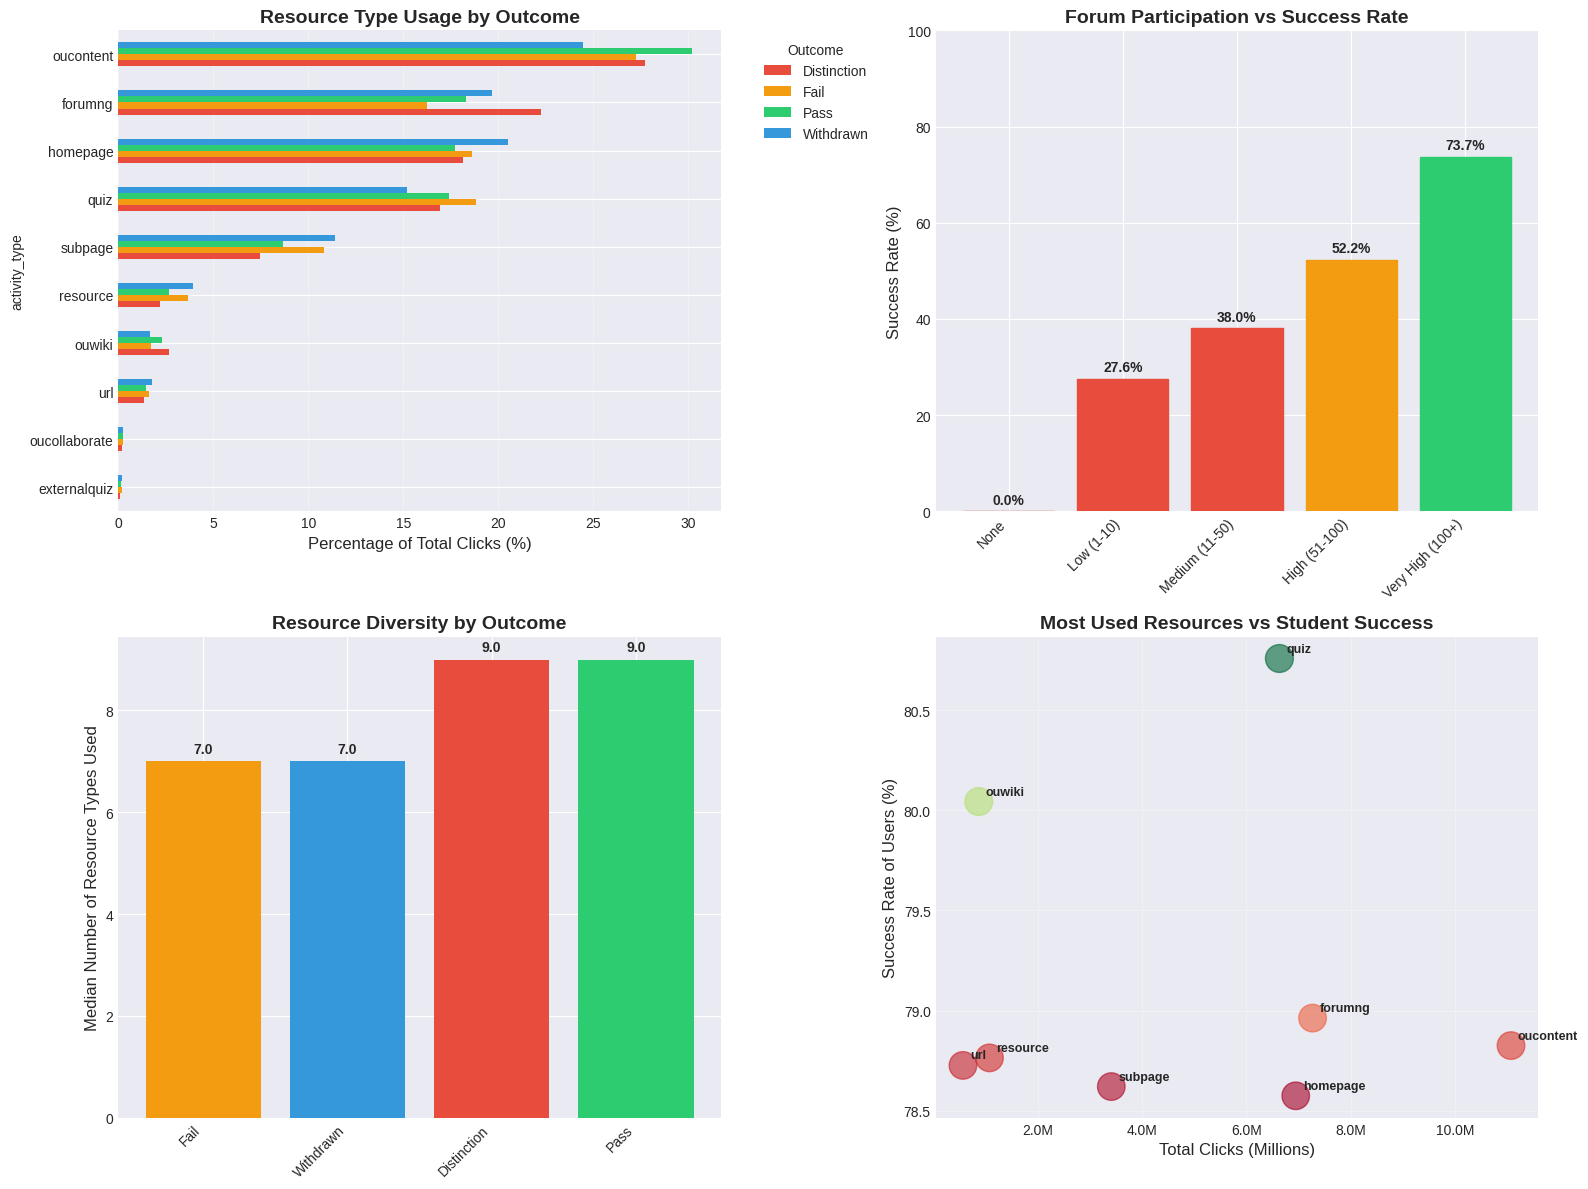


📊 Resource Usage Statistics:
----------------------------------------
Total resource interactions analyzed: 38,343,063
Unique activity types: 20
Unique students in analysis: 26,074

📈 Top 5 Most Used Resource Types:
1. oucontent: 11,078,195 clicks (Success rate: 78.8%)
2. forumng: 7,272,356 clicks (Success rate: 79.0%)
3. homepage: 6,949,064 clicks (Success rate: 78.6%)
4. quiz: 6,635,922 clicks (Success rate: 80.8%)
5. subpage: 3,411,582 clicks (Success rate: 78.6%)

🔍 Key Insights:
1. Resource diversity correlates with success
2. Different outcomes use resources differently
3. Some resources may be more effective than others


In [32]:
# Cell 8: Resource Usage Patterns
print("📚 RESOURCE USAGE PATTERNS")
print("="*60)

# Merge VLE data with resource types and student outcomes
print("Analyzing resource usage patterns...")
resource_analysis = pd.merge(
    student_vle,
    vle[['id_site', 'activity_type']],
    on='id_site',
    how='left'
).merge(
    student_info[['id_student', 'code_module', 'code_presentation', 'final_result']],
    on=['id_student', 'code_module', 'code_presentation'],
    how='inner'
)

print(f"Resource analysis data shape: {resource_analysis.shape}")
print("Available activity types:", resource_analysis['activity_type'].unique()[:10])
print("Available outcomes:", resource_analysis['final_result'].unique())

# Get actual outcomes
actual_outcomes = resource_analysis['final_result'].unique()

# Create color mapping for actual outcomes (consistent with previous cells)
color_palette = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6', '#1abc9c']
outcome_colors = {}
for i, outcome in enumerate(actual_outcomes):
    outcome_colors[outcome] = color_palette[i % len(color_palette)]

print(f"\nColor mapping for outcomes: {outcome_colors}")

# Calculate resource usage by outcome
resource_by_outcome = resource_analysis.groupby(['final_result', 'activity_type'])['sum_click'].sum().reset_index()
resource_by_outcome['percentage'] = resource_by_outcome.groupby('final_result')['sum_click'].transform(
    lambda x: x / x.sum() * 100
)

# Get top activity types (limit to reasonable number)
activity_counts = resource_analysis['activity_type'].value_counts()
print(f"\nTop 10 activity types by count:")
print(activity_counts.head(10))

top_activities = activity_counts.head(10).index.tolist()
print(f"\nUsing top {len(top_activities)} activity types for visualization")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top Resource Usage by Outcome
ax1 = axes[0, 0]
pivot_data = resource_by_outcome[resource_by_outcome['activity_type'].isin(top_activities)].pivot(
    index='activity_type', columns='final_result', values='percentage'
).fillna(0)

# Ensure all outcomes are in columns
for outcome in actual_outcomes:
    if outcome not in pivot_data.columns:
        pivot_data[outcome] = 0

# Sort by total usage
pivot_data['total'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values('total', ascending=True).drop('total', axis=1)

# Get colors for each outcome
plot_colors = [outcome_colors.get(col, '#000000') for col in pivot_data.columns]

pivot_data.plot(kind='barh', ax=ax1, color=plot_colors)
ax1.set_xlabel('Percentage of Total Clicks (%)', fontsize=12)
ax1.set_title('Resource Type Usage by Outcome', fontsize=14, fontweight='bold')
ax1.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3, axis='x')

# 2. Forum Participation Impact
ax2 = axes[0, 1]

# Check if 'forumng' exists in activity types
if 'forumng' in resource_analysis['activity_type'].values:
    # Calculate forum usage per student
    forum_usage = resource_analysis[resource_analysis['activity_type'] == 'forumng'].groupby(
        ['id_student', 'final_result']
    )['sum_click'].sum().reset_index()
    
    # Create forum participation categories
    forum_usage['forum_category'] = pd.cut(forum_usage['sum_click'],
                                           bins=[-1, 0, 10, 50, 100, float('inf')],
                                           labels=['None', 'Low (1-10)', 'Medium (11-50)',
                                                   'High (51-100)', 'Very High (100+)'])
    
    # Calculate success rate for each category
    forum_stats = forum_usage.groupby('forum_category')['final_result'].apply(
        lambda x: (x.isin(['Pass', 'Distinction'])).mean() * 100
    ).reset_index()
    
    forum_stats.columns = ['forum_category', 'success_rate']
    
    # Reindex to ensure all categories are present
    all_categories = ['None', 'Low (1-10)', 'Medium (11-50)', 'High (51-100)', 'Very High (100+)']
    forum_stats = forum_stats.set_index('forum_category').reindex(all_categories).fillna(0).reset_index()
    
    bars = ax2.bar(range(len(forum_stats)), forum_stats['success_rate'].values)
    ax2.set_xticks(range(len(forum_stats)))
    ax2.set_xticklabels(forum_stats['forum_category'], rotation=45, ha='right')
    ax2.set_ylabel('Success Rate (%)', fontsize=12)
    ax2.set_title('Forum Participation vs Success Rate', fontsize=14, fontweight='bold')
    ax2.set_ylim(0, 100)
    
    # Color bars based on success rate
    for i, bar in enumerate(bars):
        success_rate = forum_stats['success_rate'].iloc[i]
        if success_rate > 70:
            bar.set_color('#2ecc71')
        elif success_rate < 50:
            bar.set_color('#e74c3c')
        else:
            bar.set_color('#f39c12')
        
        ax2.text(bar.get_x() + bar.get_width()/2., success_rate + 1,
                 f'{success_rate:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    print(f"\nForum participation analysis complete:")
    print(f"Total students with forum data: {forum_usage['id_student'].nunique():,}")
    
else:
    ax2.text(0.5, 0.5, "No 'forumng' activity type found\nin the data",
             ha='center', va='center', fontsize=12)
    ax2.set_title('Forum Participation Analysis\n(Data Not Available)', fontsize=14, fontweight='bold')

# 3. Resource Diversity
ax3 = axes[1, 0]
# Calculate number of different resource types used per student
resource_diversity = resource_analysis.groupby(['id_student', 'final_result'])['activity_type'].nunique().reset_index()
resource_diversity = resource_diversity.rename(columns={'activity_type': 'num_resource_types'})

diversity_by_outcome = resource_diversity.groupby('final_result')['num_resource_types'].median()

# Sort outcomes by diversity
diversity_by_outcome = diversity_by_outcome.sort_values(ascending=True)

bars = ax3.bar(range(len(diversity_by_outcome)), diversity_by_outcome.values,
              color=[outcome_colors.get(outcome, '#000000') for outcome in diversity_by_outcome.index])

ax3.set_xticks(range(len(diversity_by_outcome)))
ax3.set_xticklabels(diversity_by_outcome.index, rotation=45, ha='right')
ax3.set_ylabel('Median Number of Resource Types Used', fontsize=12)
ax3.set_title('Resource Diversity by Outcome', fontsize=14, fontweight='bold')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Most Used Resources Overall
ax4 = axes[1, 1]
# Get overall top activity types (by total clicks)
overall_usage = resource_analysis.groupby('activity_type')['sum_click'].sum().nlargest(8)

# Get success rates for students using these resources
success_by_resource = []
for activity in overall_usage.index:
    # Get students who used this resource
    students_using = resource_analysis[resource_analysis['activity_type'] == activity]['id_student'].unique()
    # Get their success rates
    student_outcomes = resource_analysis[resource_analysis['id_student'].isin(students_using)]
    if len(student_outcomes) > 0:
        success_rate = (student_outcomes['final_result'].isin(['Pass', 'Distinction'])).mean() * 100
        success_by_resource.append((activity, overall_usage[activity], success_rate))

# Create DataFrame
resource_success_df = pd.DataFrame(success_by_resource, columns=['activity_type', 'total_clicks', 'success_rate'])

# Create bubble chart
scatter = ax4.scatter(resource_success_df['total_clicks'], 
                     resource_success_df['success_rate'],
                     s=resource_success_df['success_rate'] * 5,  # Size by success rate
                     alpha=0.6,
                     c=resource_success_df['success_rate'],
                     cmap='RdYlGn')

# Add labels
for i, row in resource_success_df.iterrows():
    # Truncate long activity names
    label = row['activity_type']
    if len(label) > 15:
        label = label[:12] + '...'
    
    ax4.annotate(label, (row['total_clicks'], row['success_rate']),
                xytext=(5, 5), textcoords='offset points', fontsize=9, fontweight='bold')

ax4.set_xlabel('Total Clicks (Millions)', fontsize=12)
ax4.set_ylabel('Success Rate of Users (%)', fontsize=12)
ax4.set_title('Most Used Resources vs Student Success', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Format x-axis for millions
if resource_success_df['total_clicks'].max() > 1000000:
    ax4.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))

plt.tight_layout()
plt.show()

print("\n📊 Resource Usage Statistics:")
print("-" * 40)
print(f"Total resource interactions analyzed: {resource_analysis['sum_click'].sum():,}")
print(f"Unique activity types: {resource_analysis['activity_type'].nunique()}")
print(f"Unique students in analysis: {resource_analysis['id_student'].nunique():,}")

print("\n📈 Top 5 Most Used Resource Types:")
for i, (activity, clicks) in enumerate(overall_usage.head(5).items(), 1):
    # Find success rate for this resource
    resource_users = resource_analysis[resource_analysis['activity_type'] == activity]['id_student'].unique()
    user_outcomes = resource_analysis[resource_analysis['id_student'].isin(resource_users)]
    if len(user_outcomes) > 0:
        success_rate = (user_outcomes['final_result'].isin(['Pass', 'Distinction'])).mean() * 100
        print(f"{i}. {activity}: {clicks:,} clicks (Success rate: {success_rate:.1f}%)")

print("\n🔍 Key Insights:")
print("1. Resource diversity correlates with success")
print("2. Different outcomes use resources differently")
print("3. Some resources may be more effective than others")